In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from scipy.stats import chi2_contingency


# Load the data
data = pd.read_csv('NYC DATA.csv')

# Display general information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

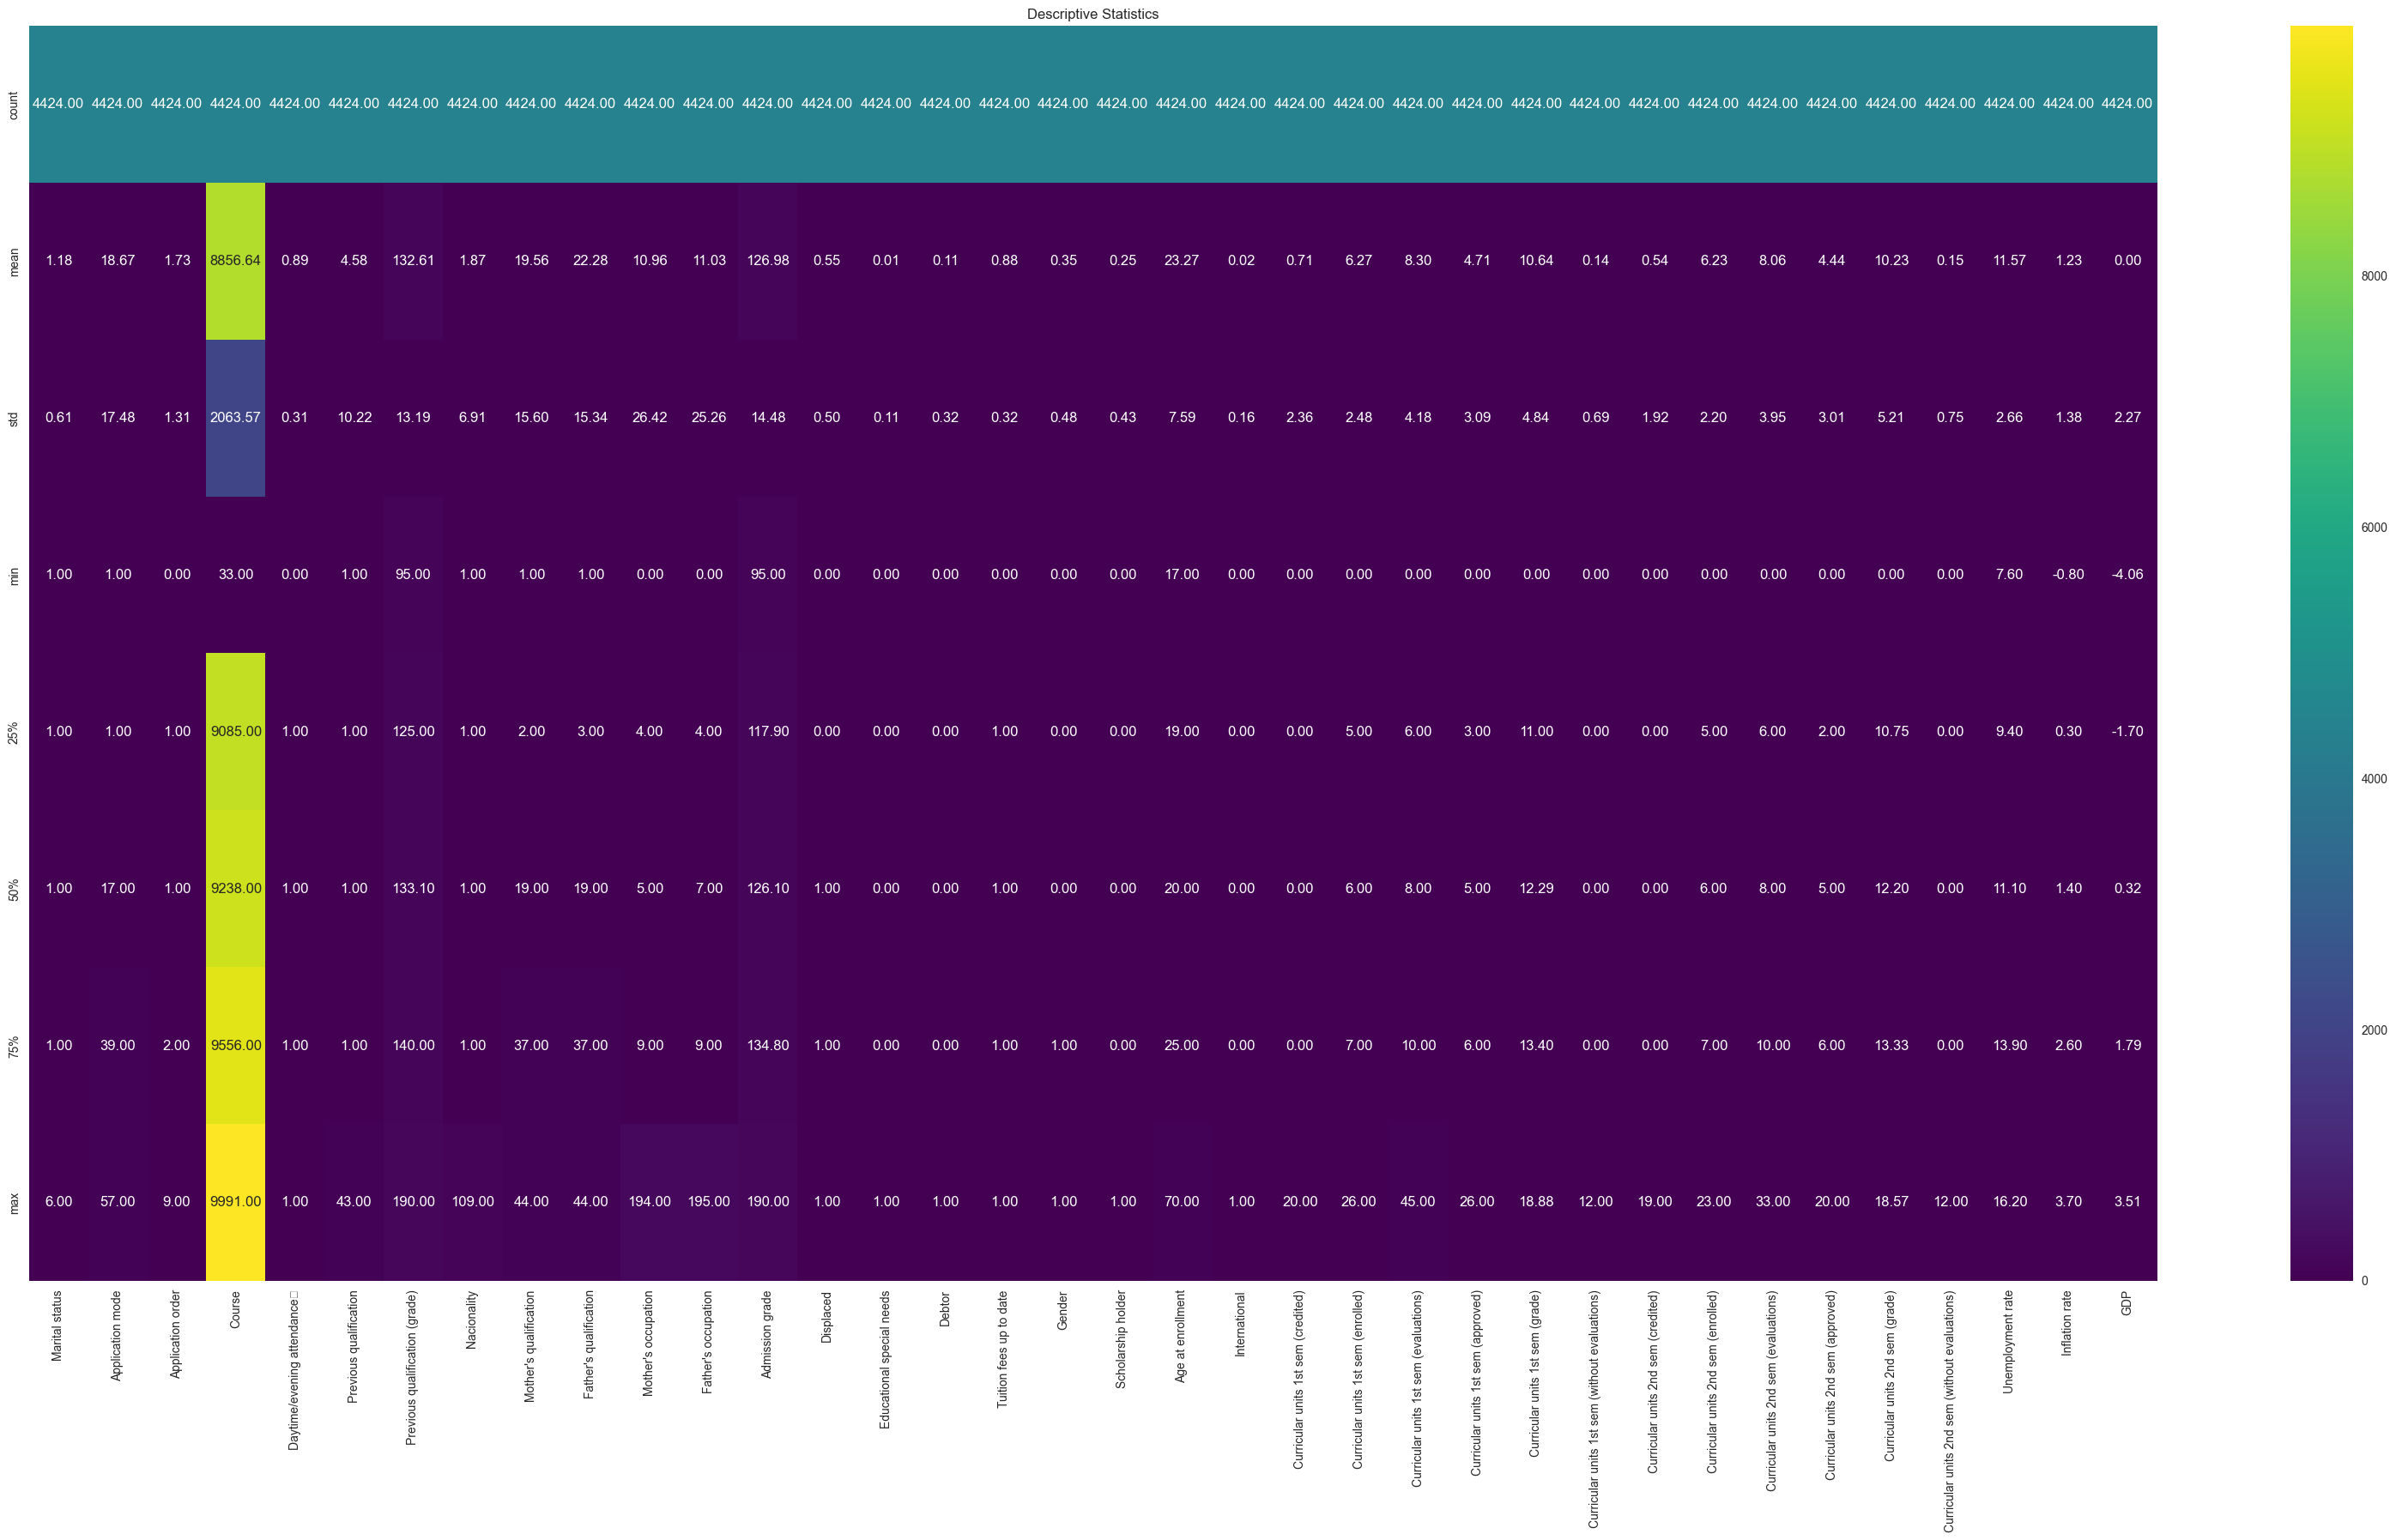

In [11]:
# 1. Descriptive statistics
descriptive_stats = data.describe()

# 2. Visualize descriptive statistics
plt.figure(figsize=(40, 19))
sns.heatmap(descriptive_stats, annot=True, cmap='viridis', fmt=".2f")
plt.title('Descriptive Statistics')
plt.show()

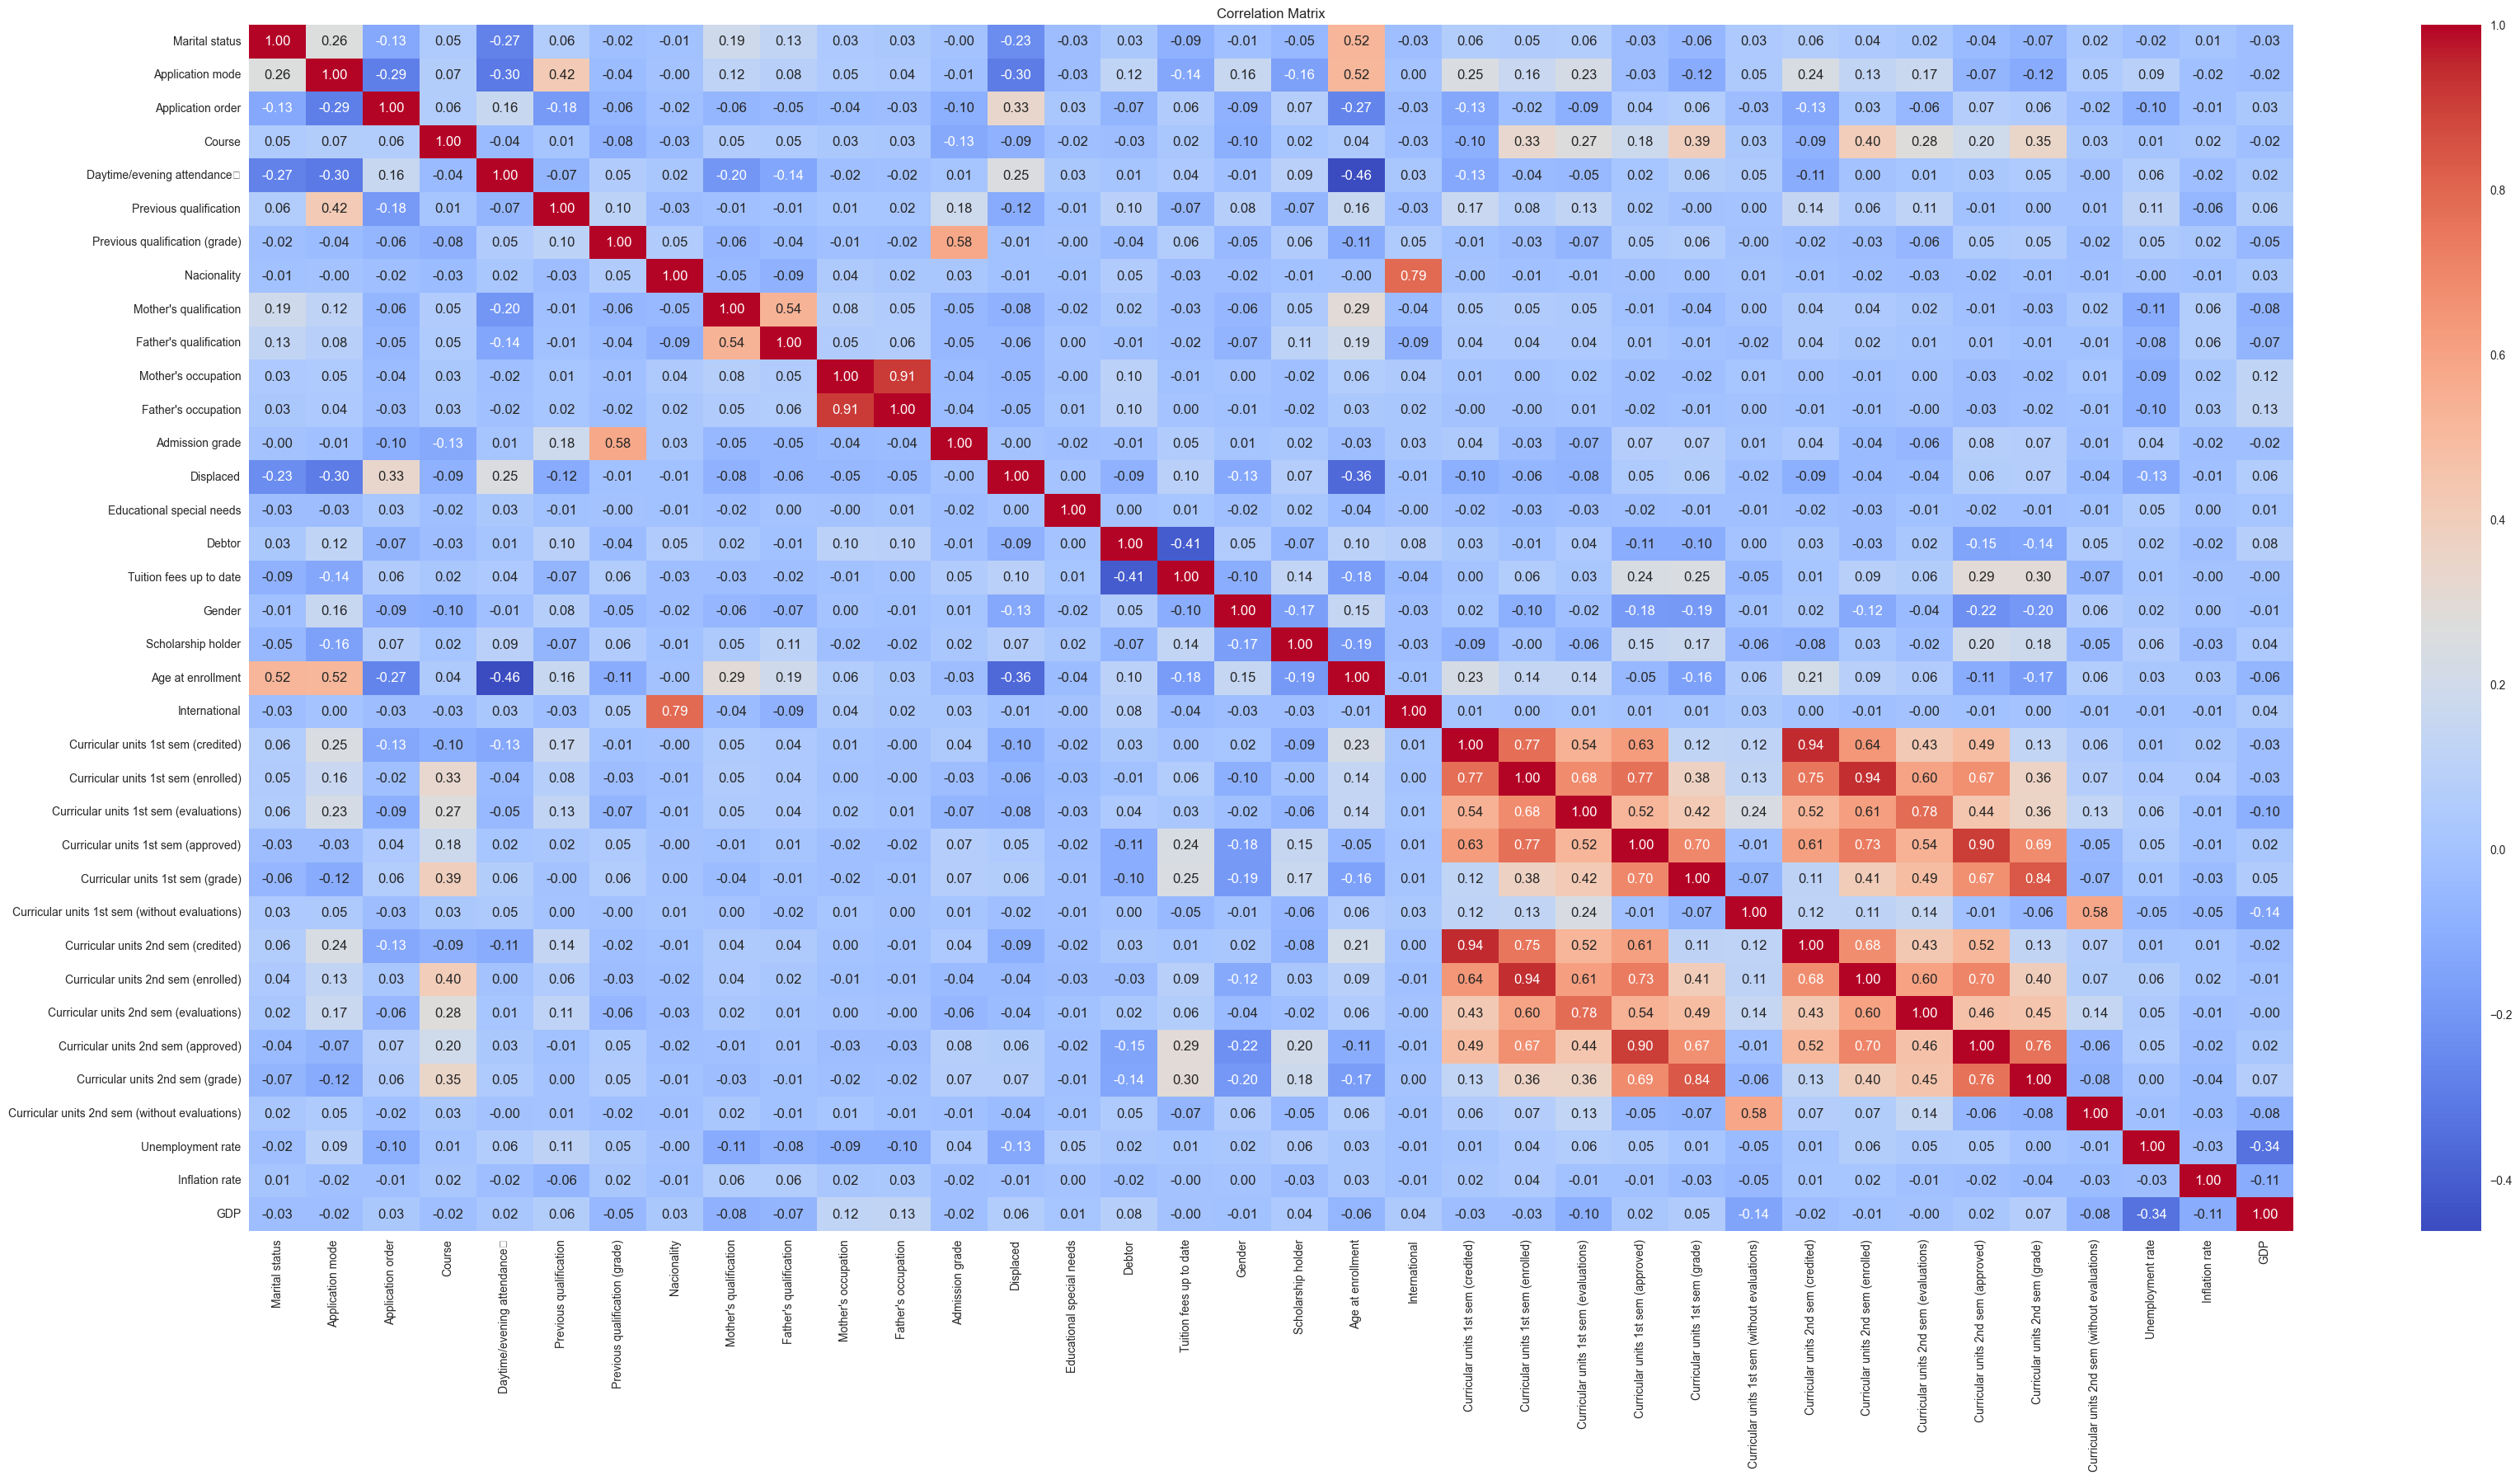

In [12]:

# 3. Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(40, 19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [13]:

# 4. Factor Analysis
X = data.drop(['Target'], axis=1)
factor = FactorAnalysis().fit(X)
loadings = pd.DataFrame(factor.components_, columns=X.columns)

# 5. Hypotheses and Chi-square test
contingency_table = pd.crosstab(data['Marital status'], data['Target'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")



Chi-square statistic: 63.43854947026341
P-value: 8.054279703889306e-10


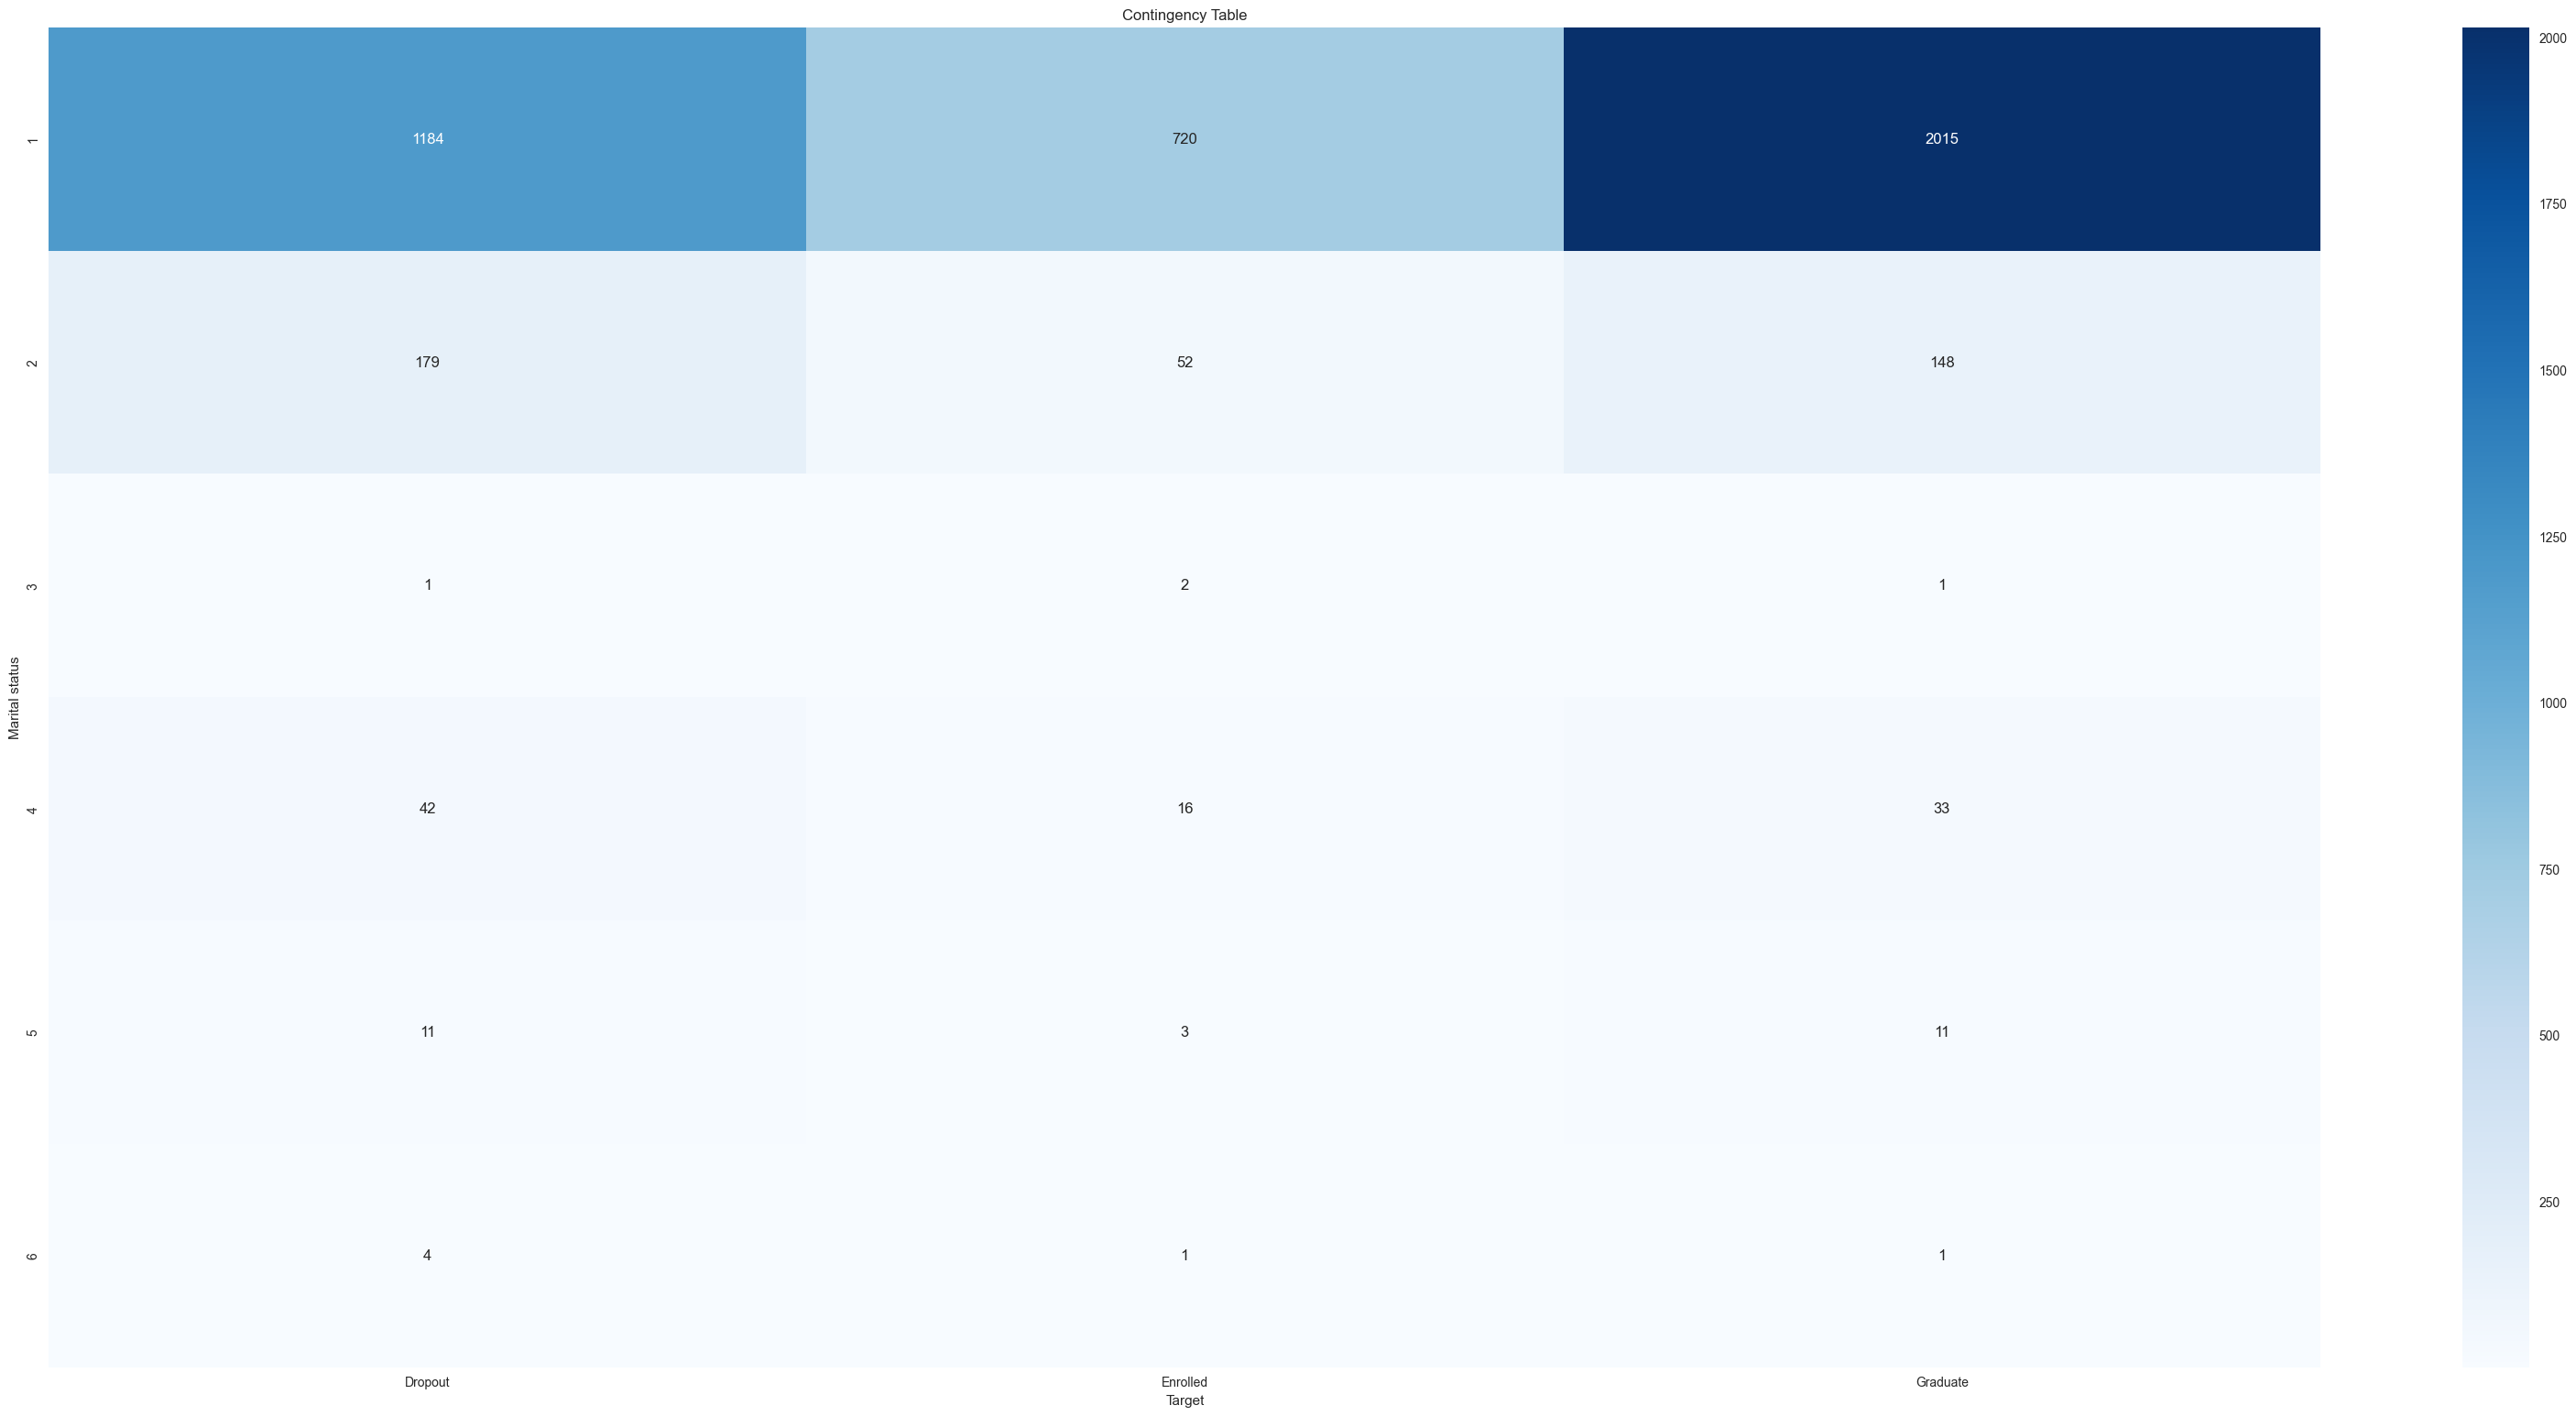

In [14]:
# Visualize the contingency table
plt.figure(figsize=(40, 19))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt="d")
plt.title('Contingency Table')
plt.show()


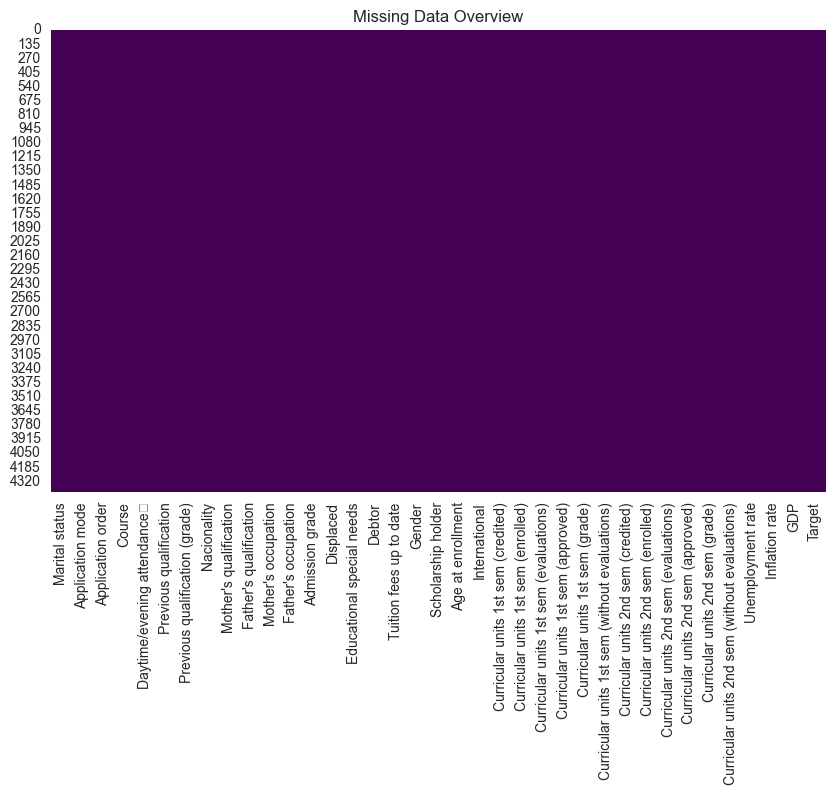

In [15]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Overview')
plt.show()


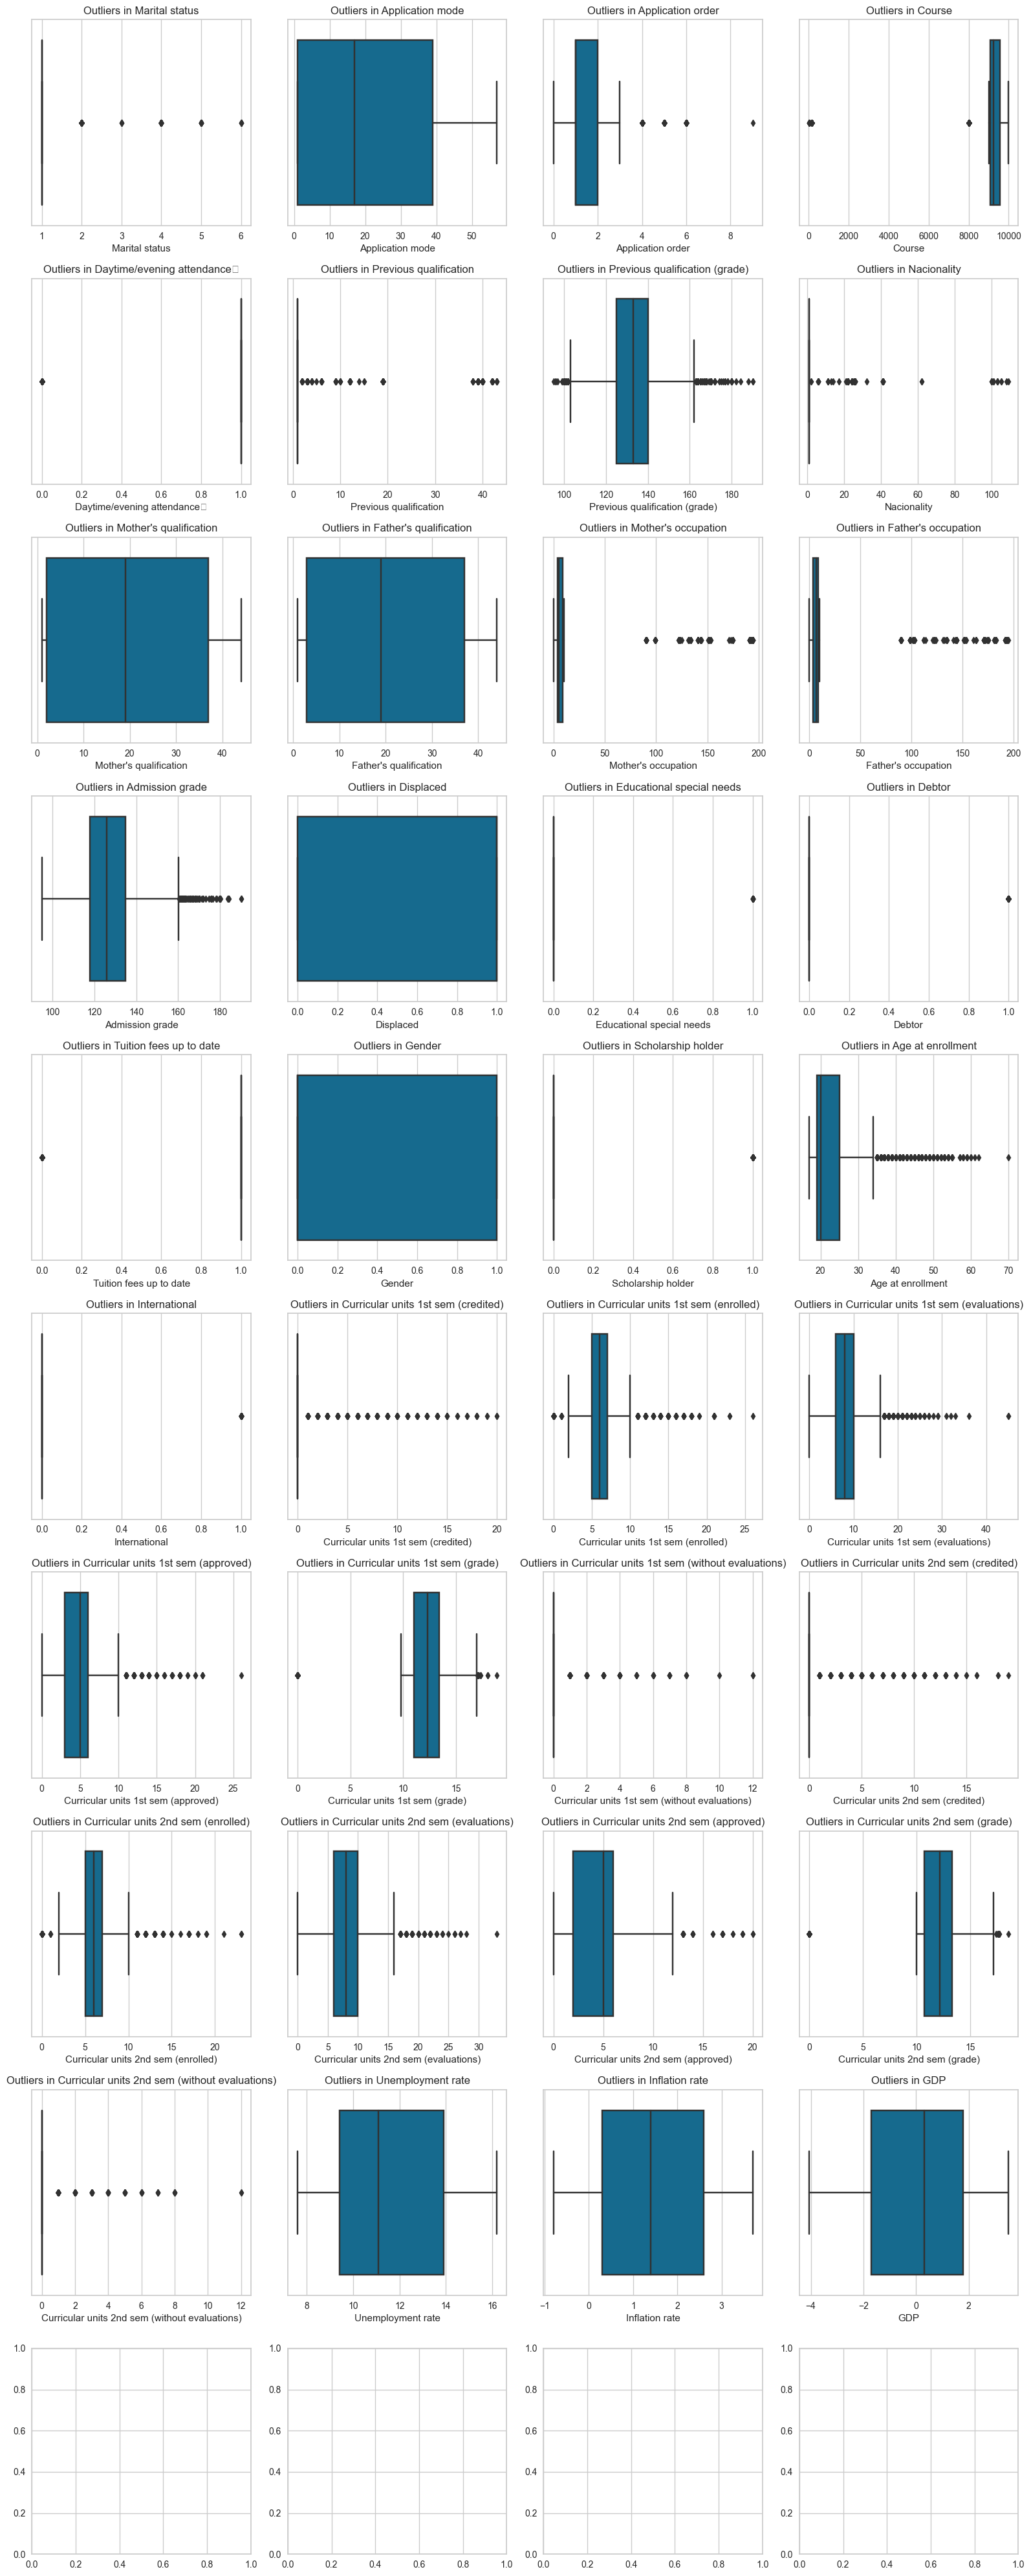

In [16]:

# Analyze outliers
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns)//4 + 1, ncols=4, figsize=(16, 4*(len(numeric_columns)//4 + 1)))

for idx, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[idx//4, idx%4])
    axes[idx//4, idx%4].set_title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

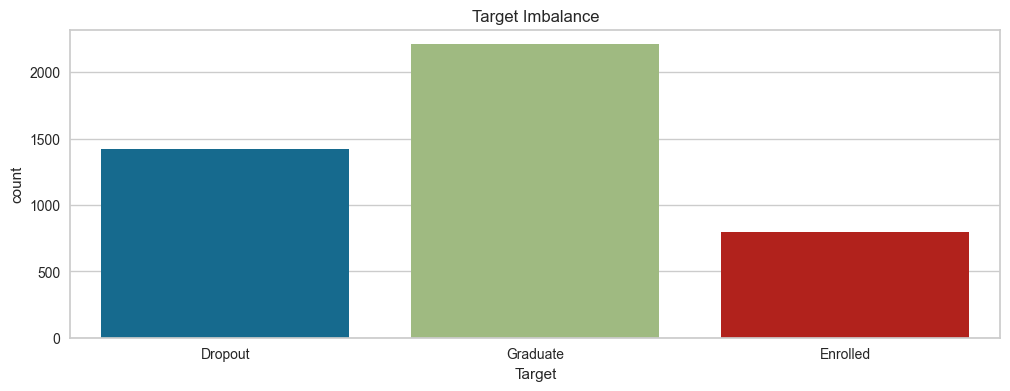

In [17]:

# Visualize target imbalance
plt.figure(figsize=(12, 4))
sns.countplot(x='Target', data=data)
plt.title('Target Imbalance')
plt.show()

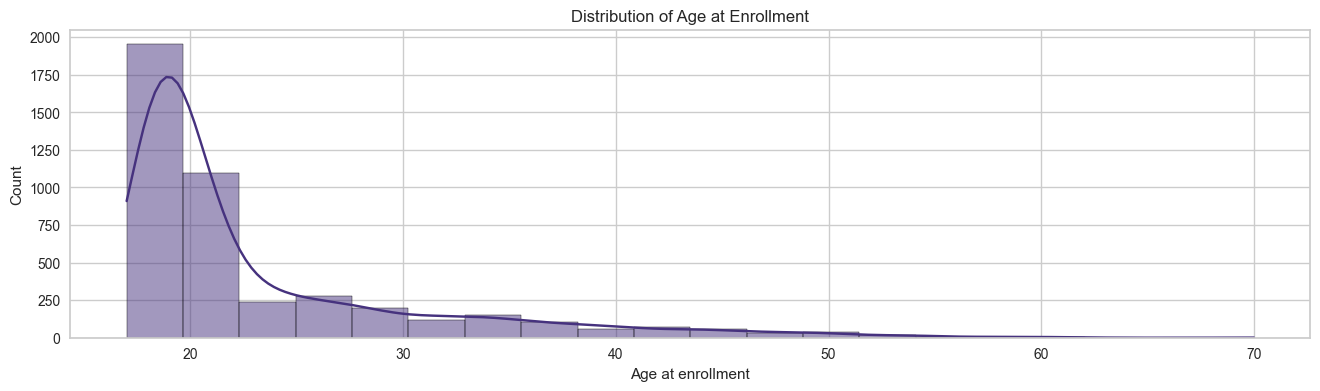

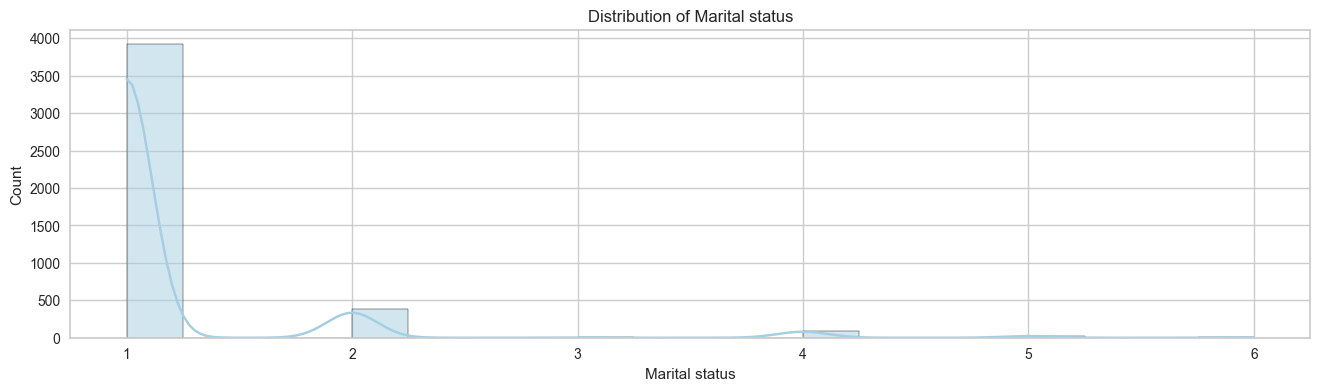

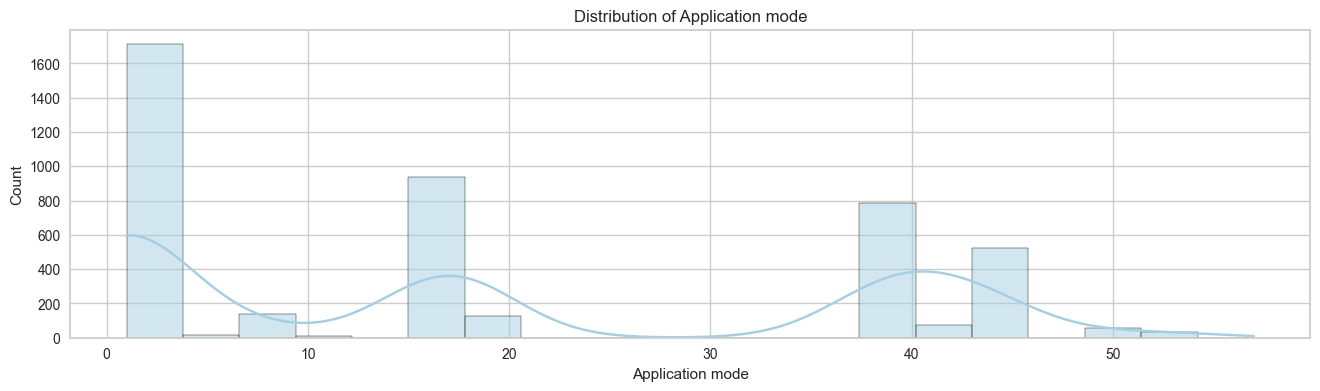

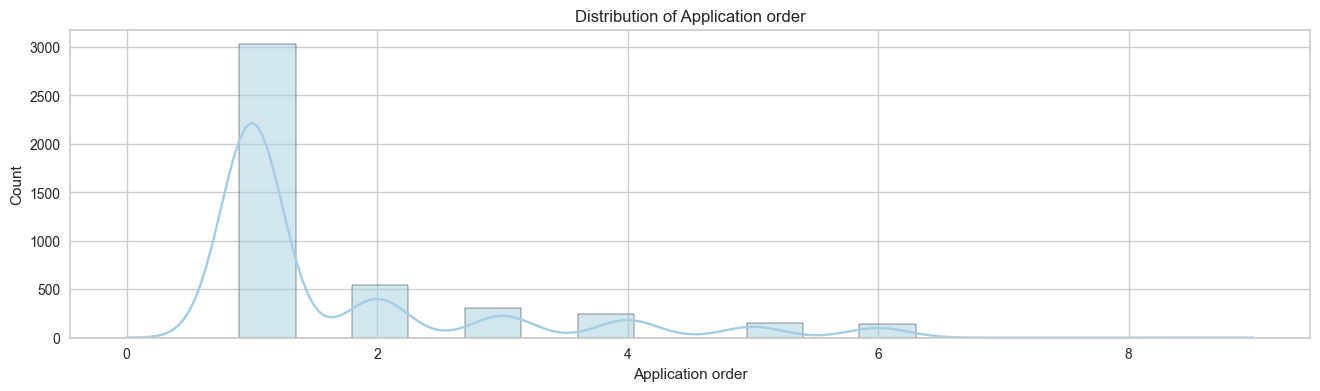

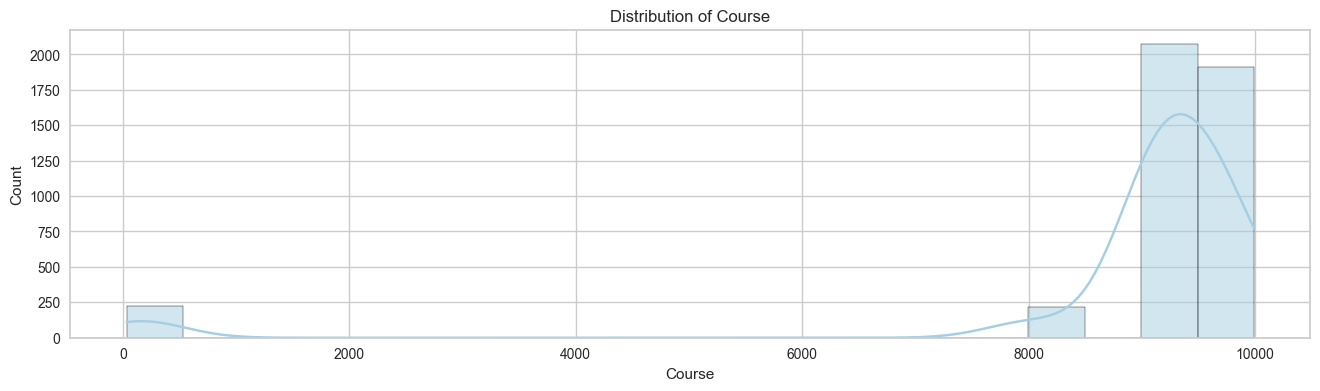

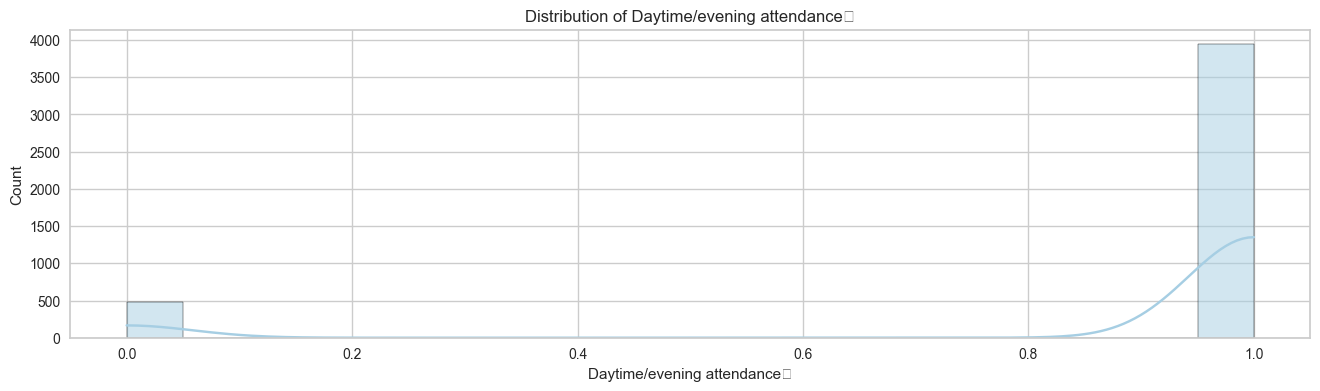

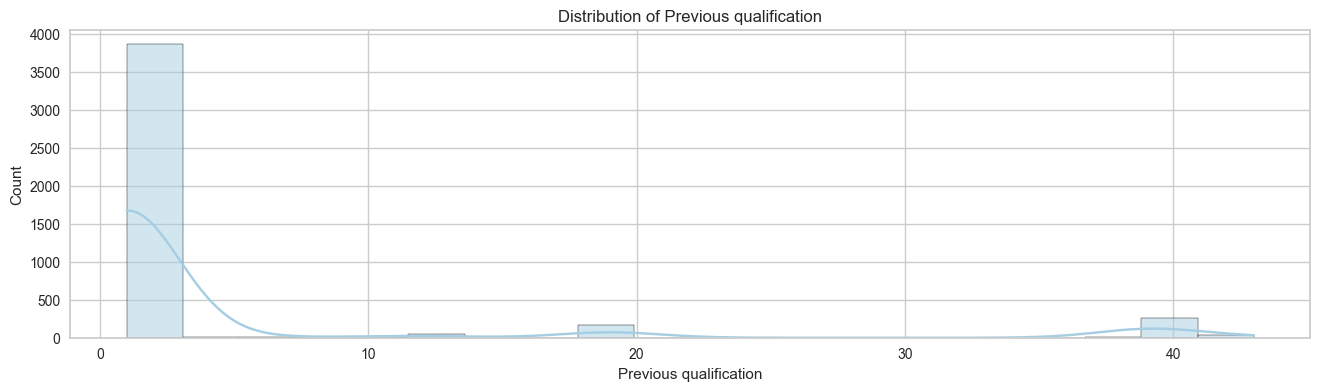

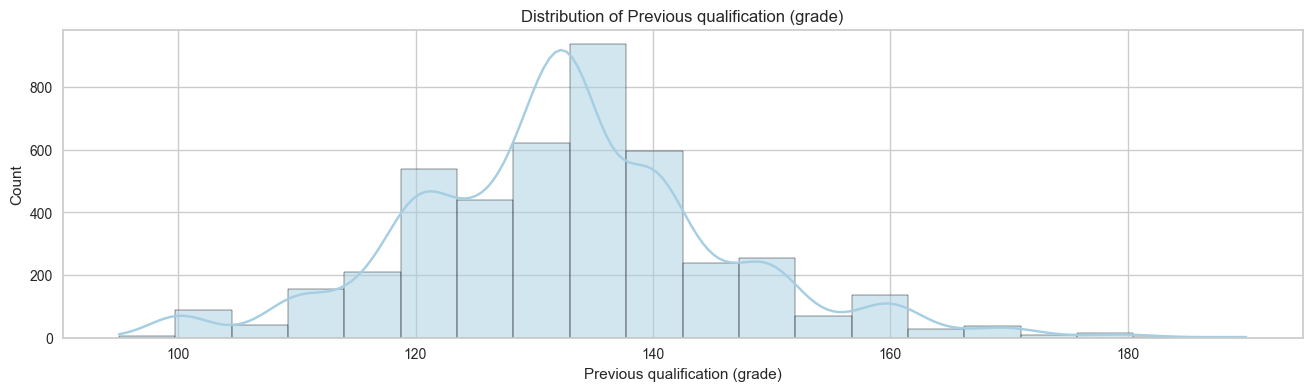

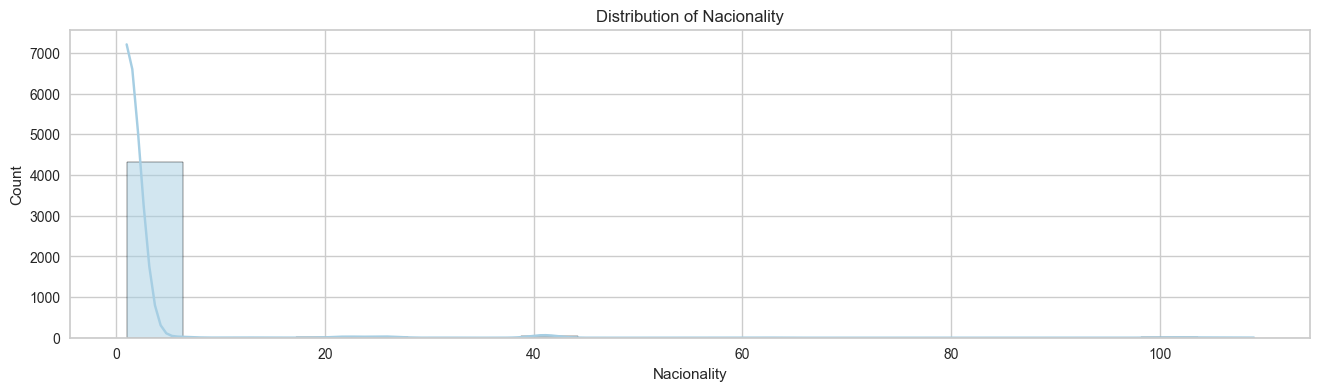

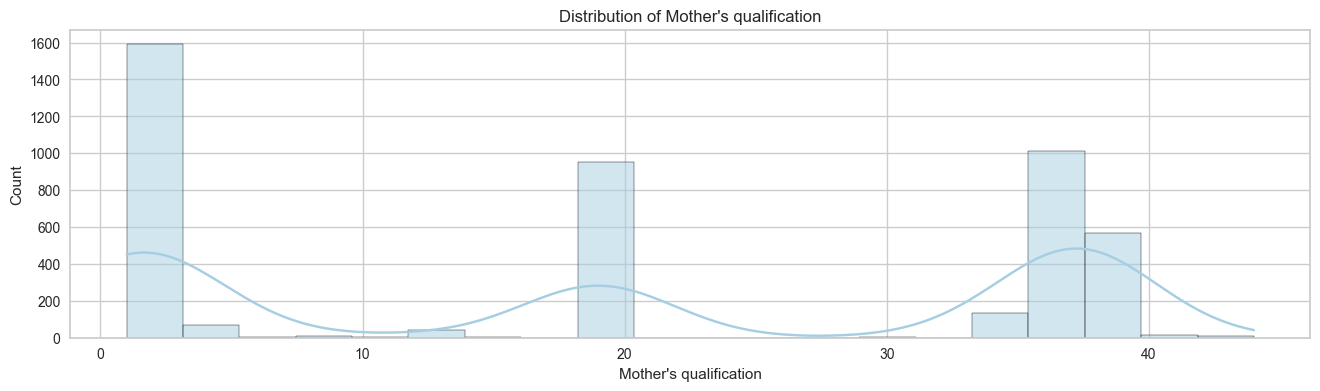

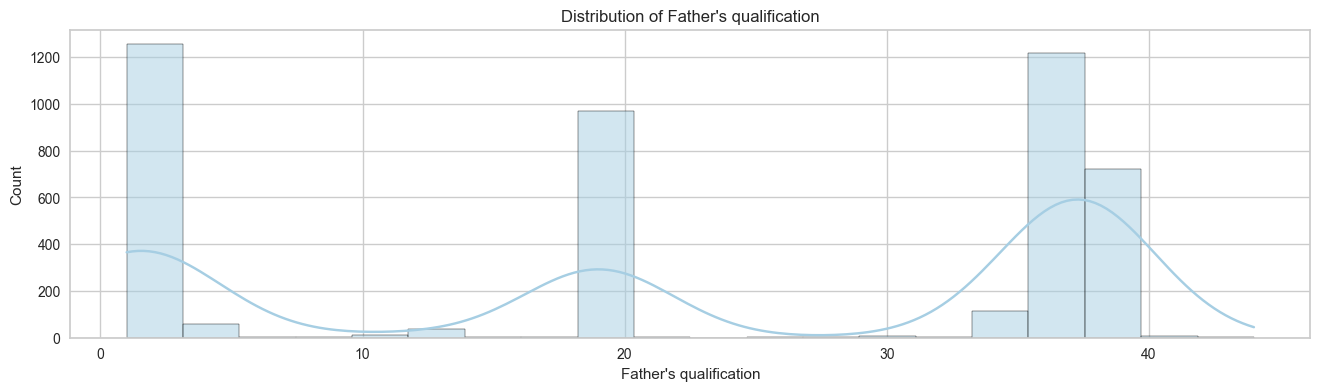

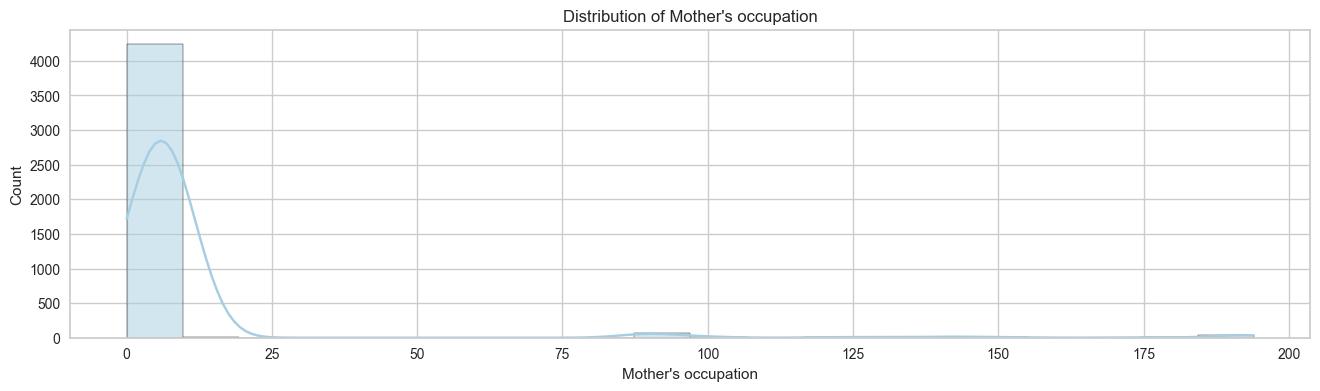

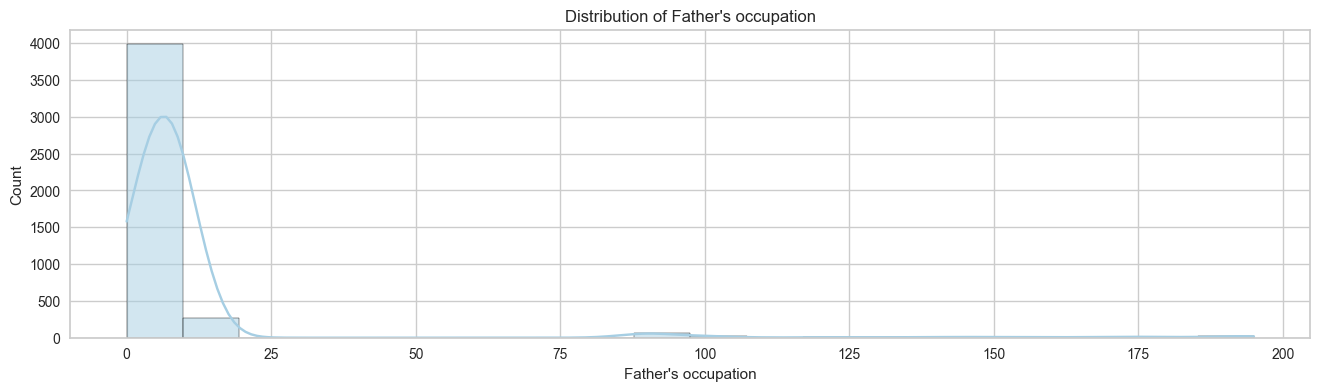

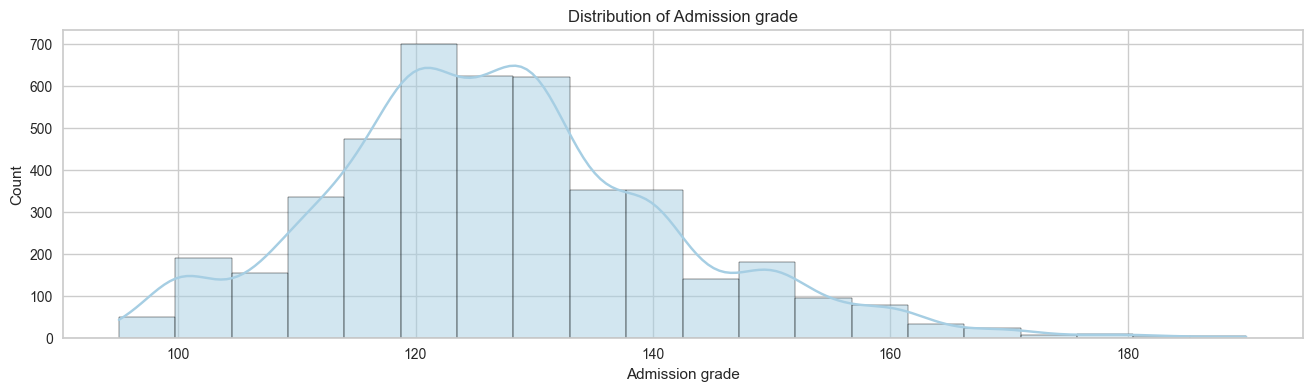

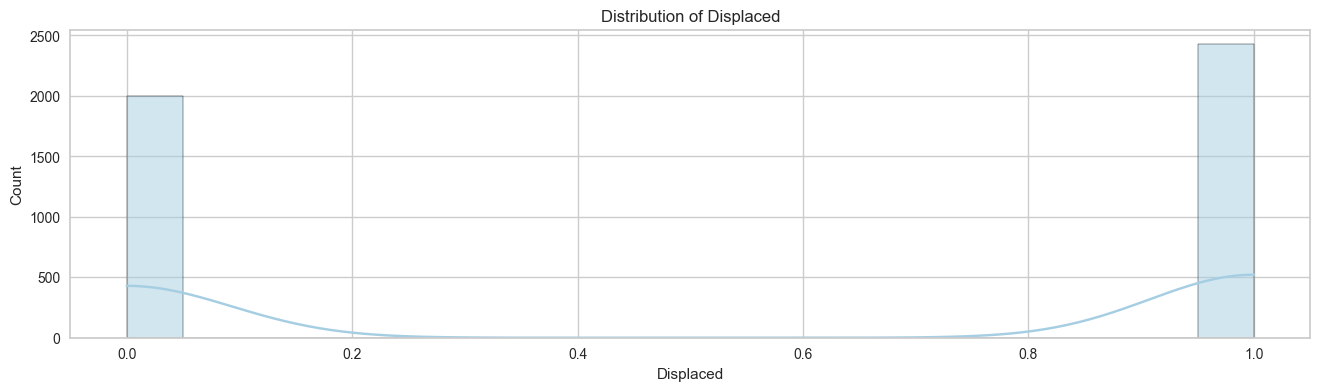

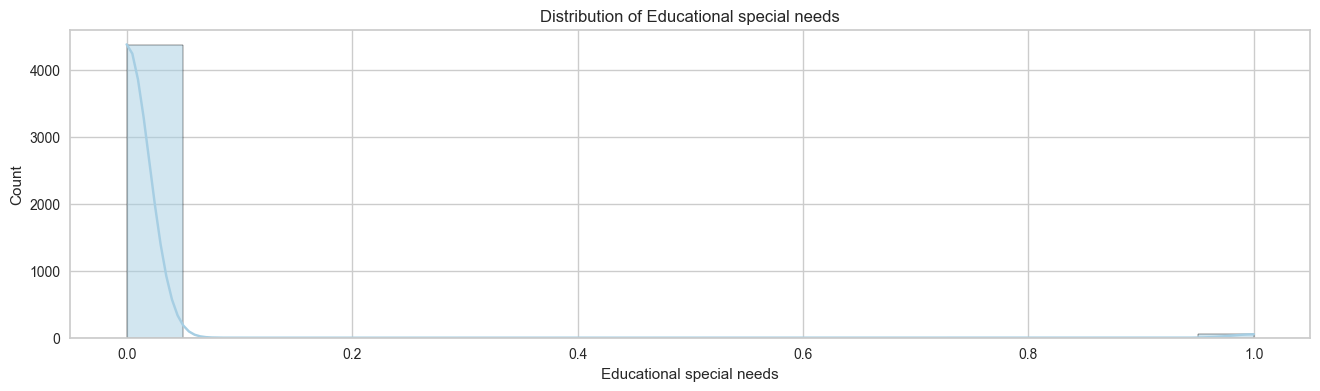

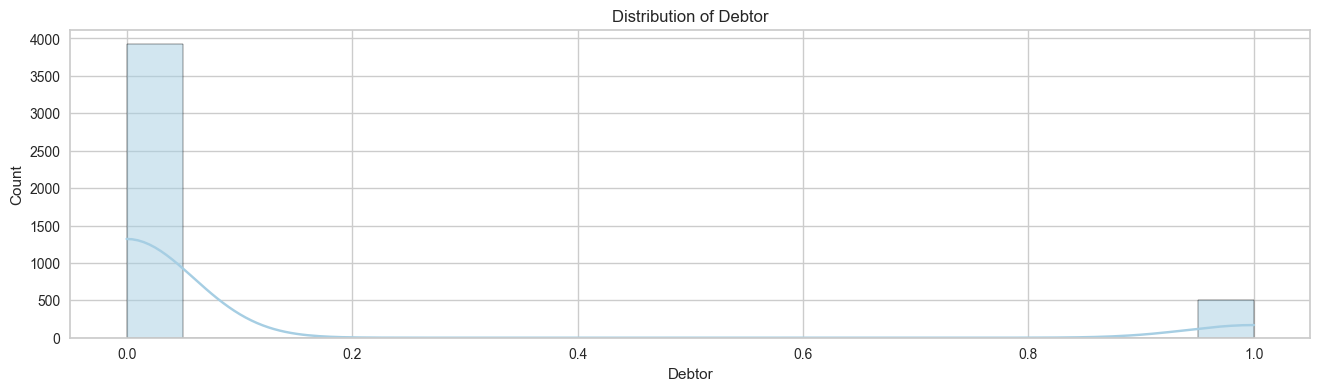

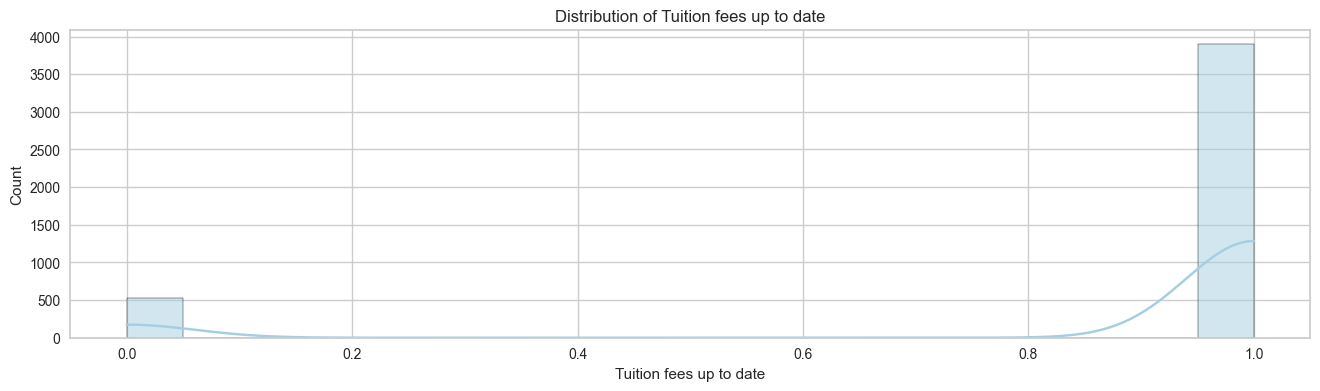

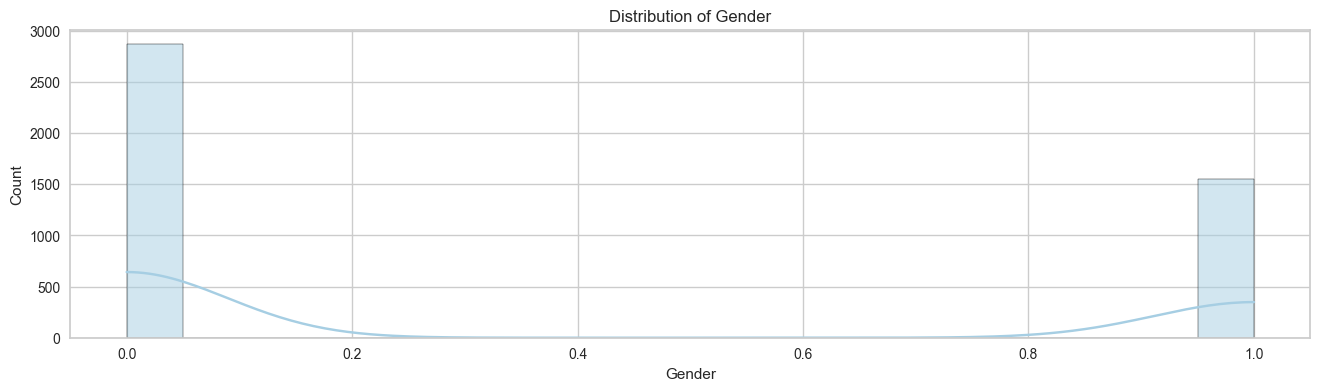

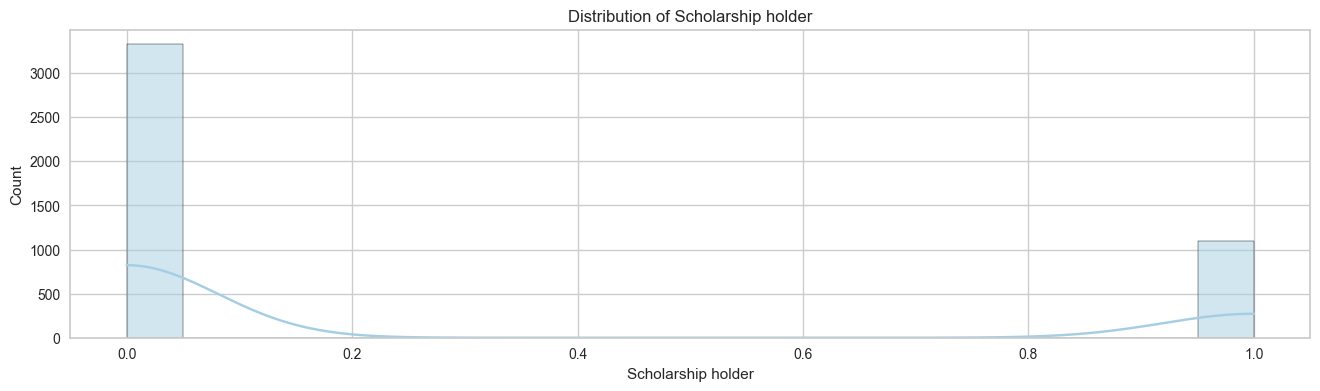

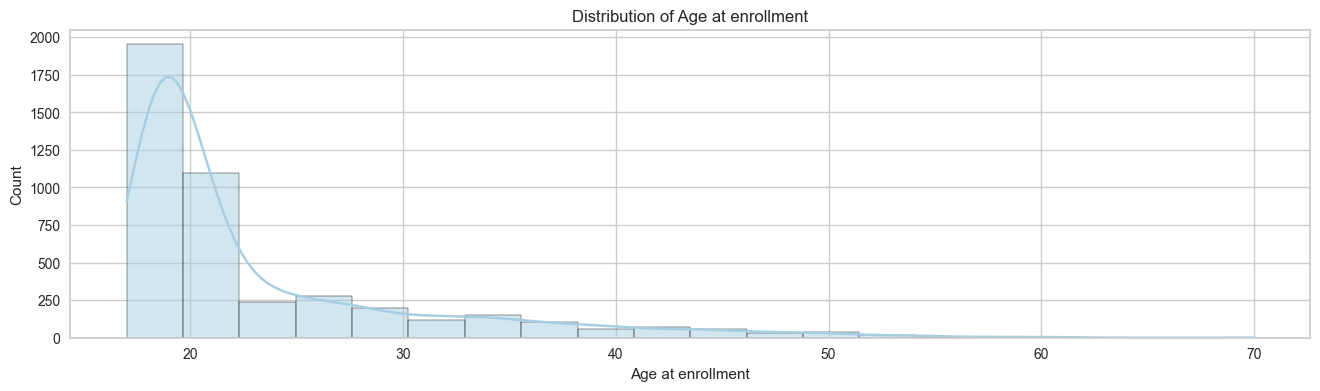

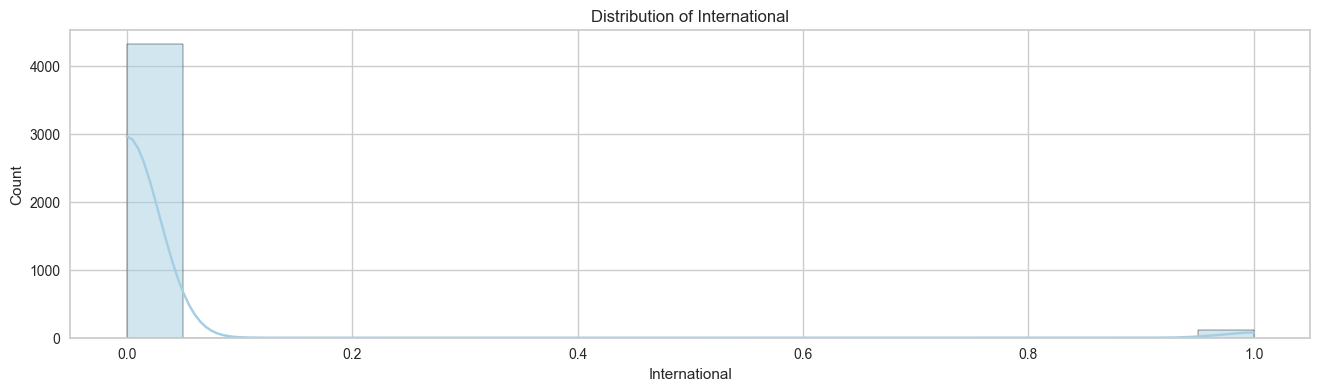

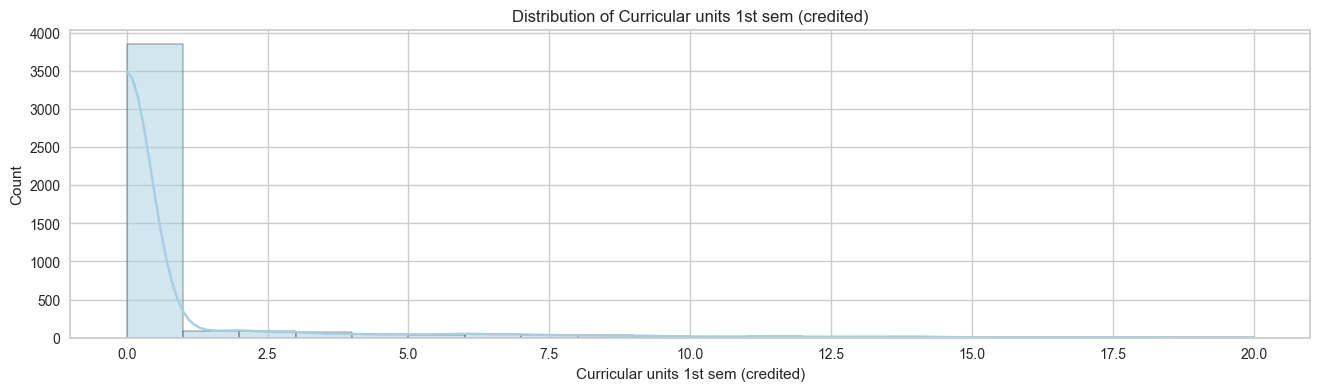

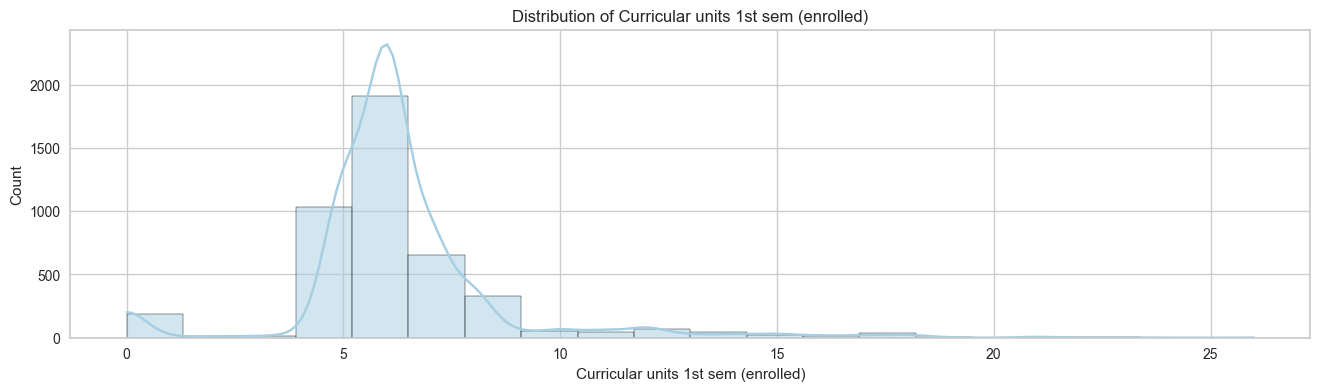

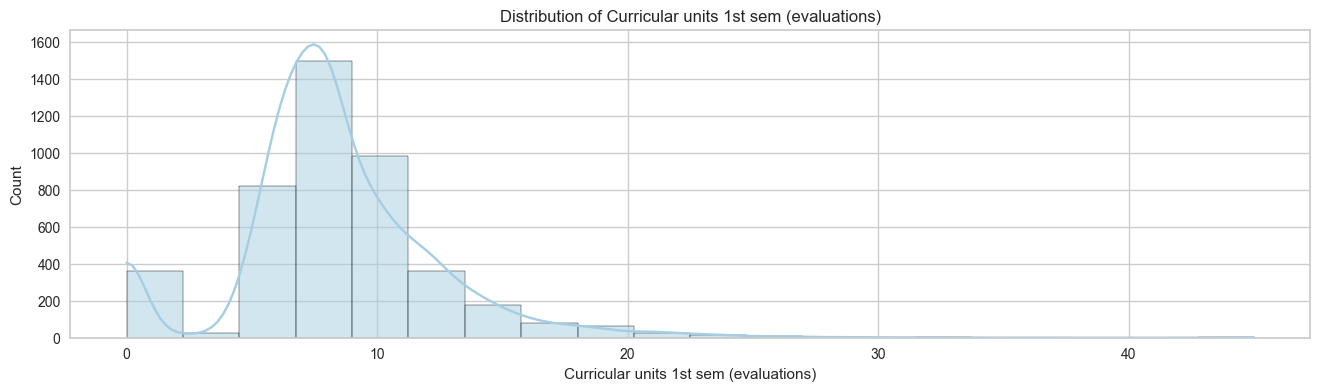

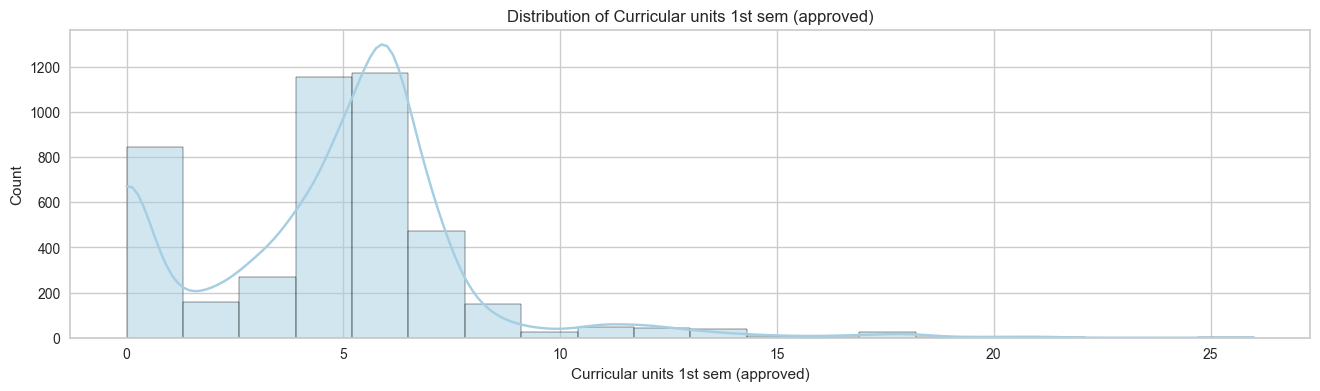

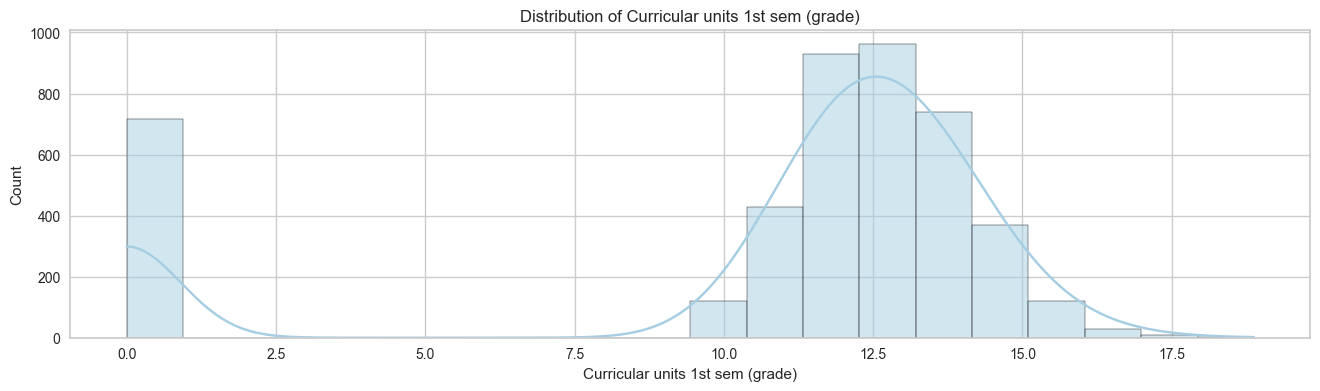

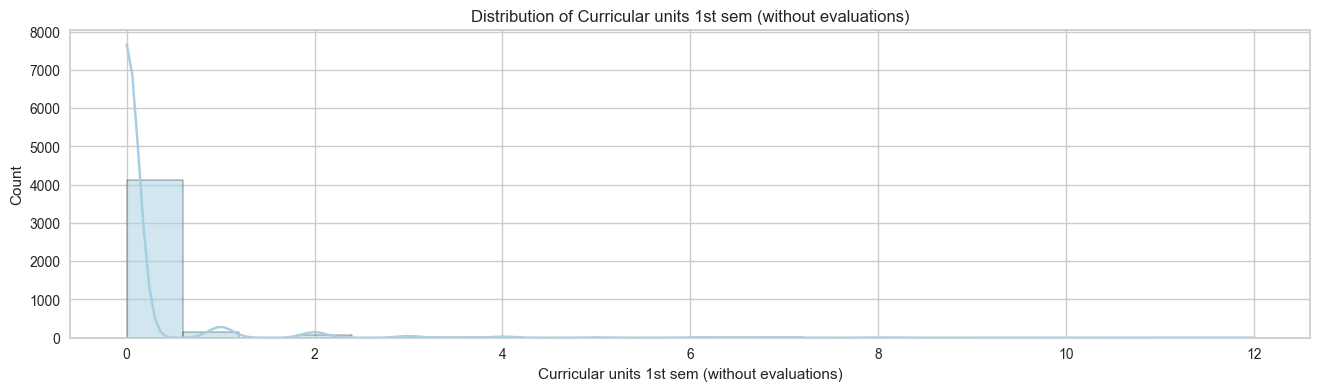

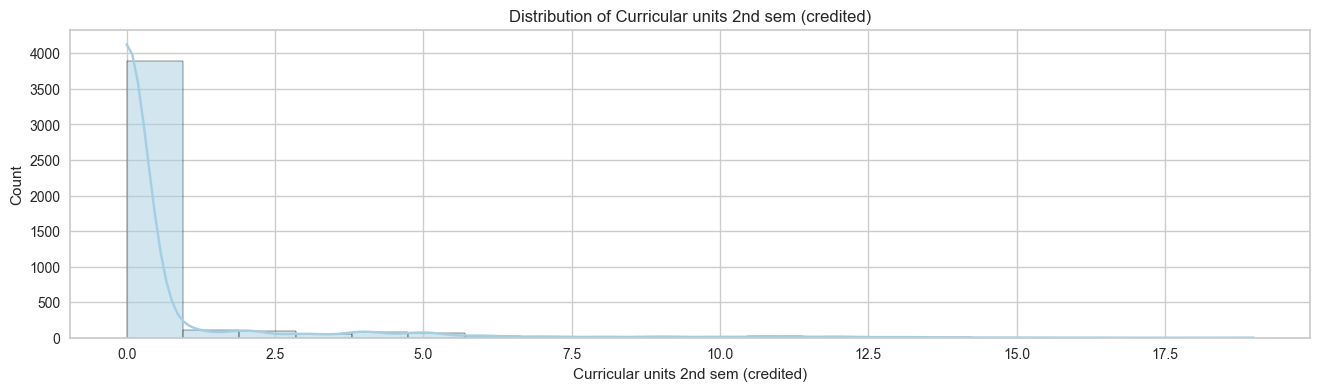

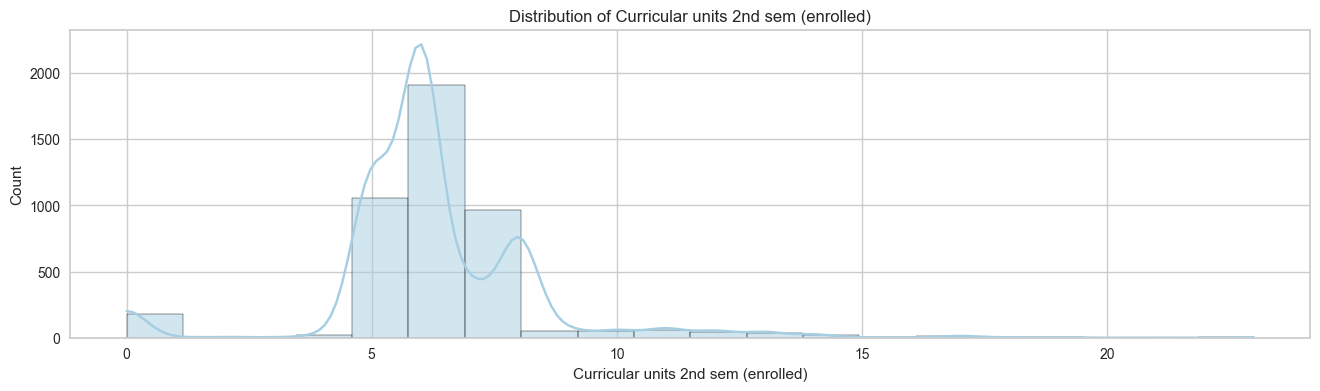

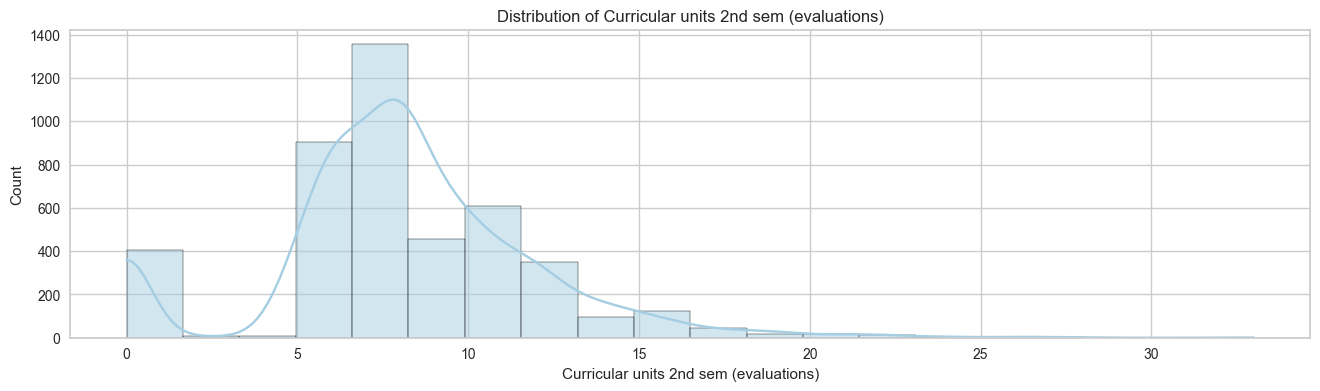

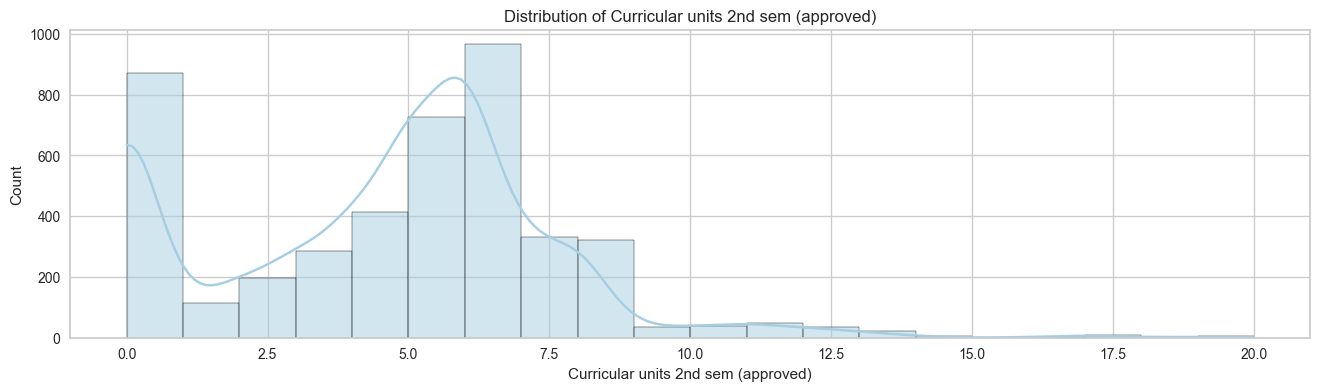

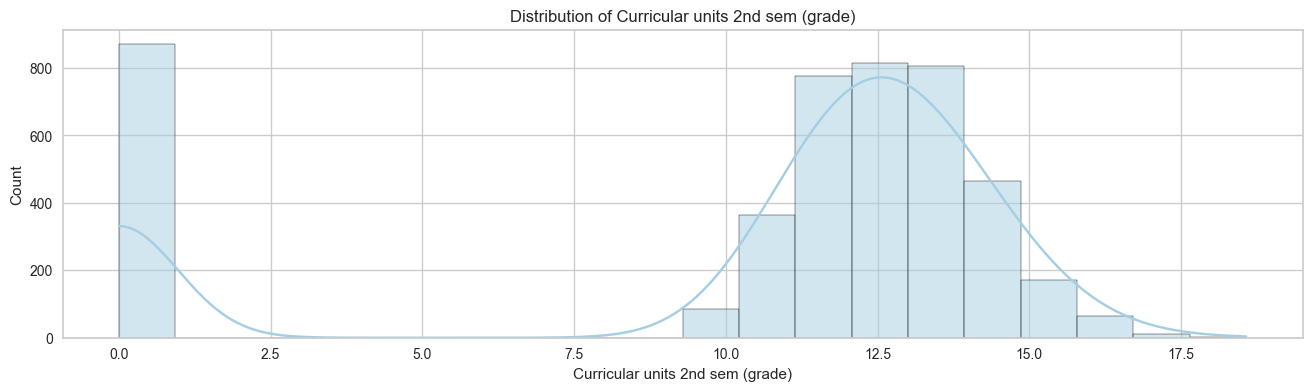

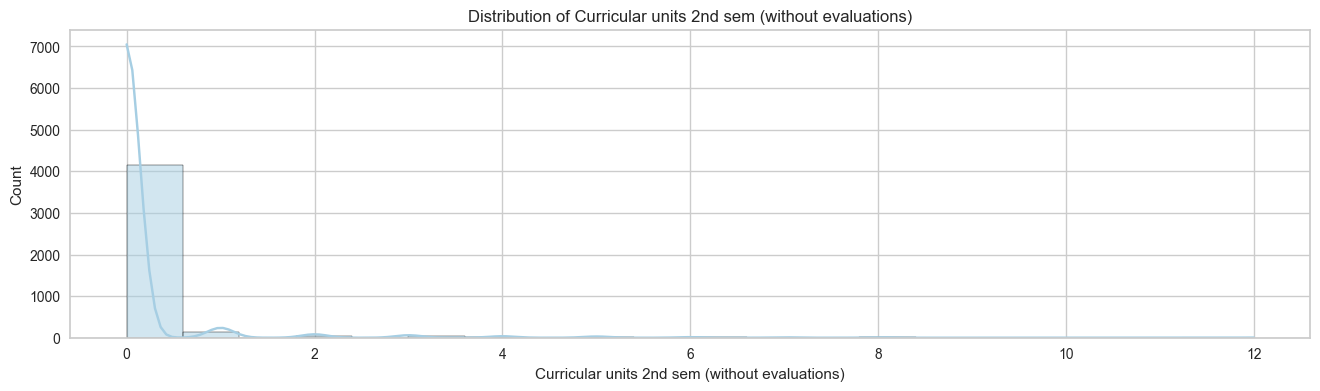

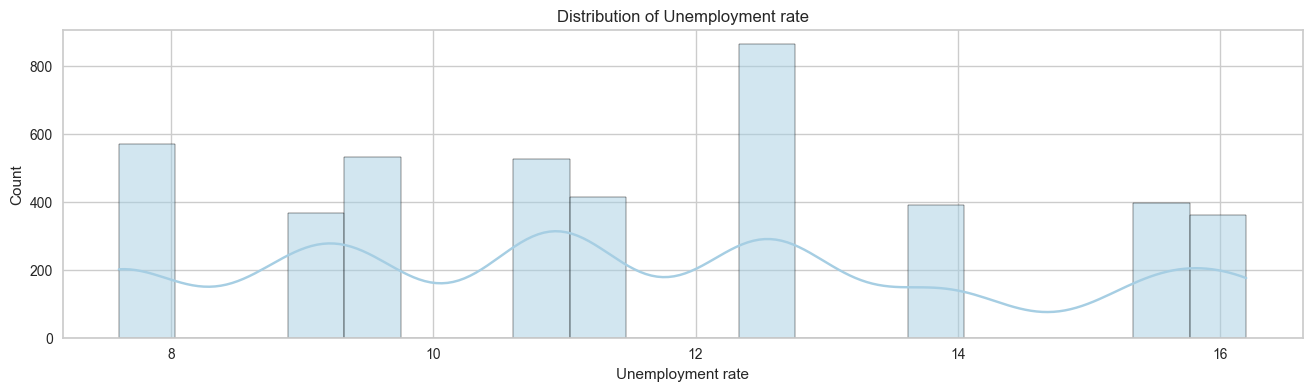

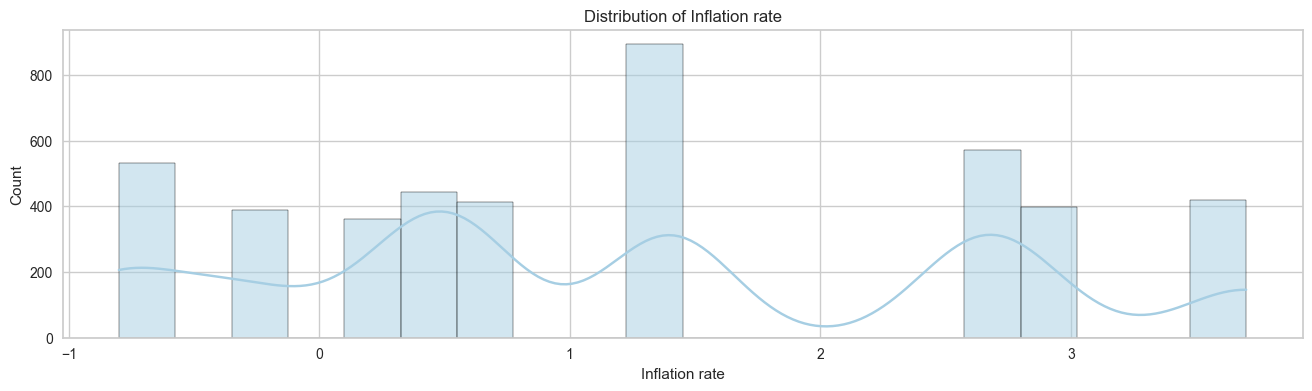

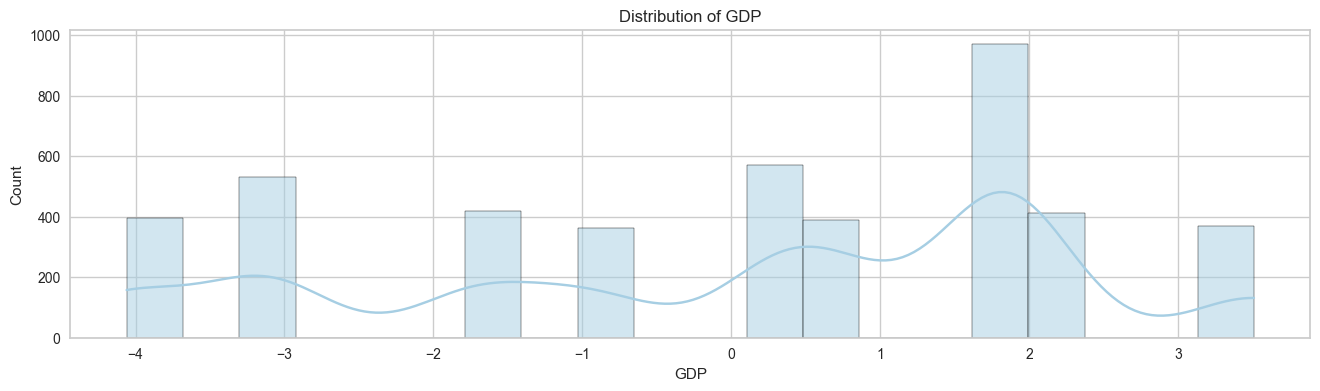

In [20]:

# Distribution of 'Age at enrollment'
plt.figure(figsize=(16, 4))
sns.histplot(data['Age at enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at Enrollment')
plt.show()

sns.set_palette("Paired")

# Loop through each column (excluding the last column, which is the target)
for col in data.columns[:-1]:
    plt.figure(figsize=(16, 4))
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.histplot(data[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
    else:
        # For non-numeric columns, create a count plot
        sns.countplot(x=col, data=data)
        plt.title(f'Count of each category in {col}')
        plt.xticks(rotation=45, ha='right') 
    
    plt.show()


In [5]:

# Define a function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_no_outliers = remove_outliers_zscore(data[numeric_columns])
# Display the difference in shape
print("Shape before removing outliers:", data.shape)
print("Shape after removing outliers:", data_no_outliers.shape)


Shape before removing outliers: (4424, 37)
Shape after removing outliers: (3081, 36)


In [7]:
# Assuming you have already imported pycaret.classification
from pycaret.classification import *

# Setup the classification experiment
s = setup(data, target='Target', session_id=123)

# Compare different classification models
best_model = compare_models()

# Train the best model
final_model = create_model(best_model)

# Evaluate the model on the test set
evaluate_model(final_model)


,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(4424, 37)"
5,Transformed data shape,"(4424, 37)"
6,Transformed train set shape,"(3096, 37)"
7,Transformed test set shape,"(1328, 37)"
8,Numeric features,36
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7726,0.9039,0.7726,0.7599,0.7597,0.6164,0.6230,0.3500
et,Extra Trees Classifier,0.7723,0.8985,0.7723,0.7571,0.7558,0.6126,0.6221,0.0890
lightgbm,Light Gradient Boosting Machine,0.7713,0.8996,0.7713,0.7597,0.7604,0.6161,0.6214,0.7080
catboost,CatBoost Classifier,0.7694,0.8984,0.7694,0.7566,0.7574,0.6121,0.6178,1.5800
rf,Random Forest Classifier,0.7684,0.8957,0.7684,0.7535,0.7510,0.6058,0.6153,0.0950
ada,Ada Boost Classifier,0.7587,0.8496,0.7587,0.7475,0.7494,0.5968,0.6005,0.0540
ridge,Ridge Classifier,0.7571,0.0000,0.7571,0.7414,0.7185,0.5726,0.6002,0.0110
lda,Linear Discriminant Analysis,0.7564,0.8904,0.7564,0.7505,0.7439,0.5867,0.5976,0.0160
lr,Logistic Regression,0.7264,0.8695,0.7264,0.7054,0.7056,0.5339,0.5429,0.9530
qda,Quadratic Discriminant Analysis,0.7203,0.8541,0.7203,0.7064,0.7091,0.5309,0.5353,0.0130


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7806,0.9138,0.7806,0.7674,0.7699,0.6322,0.6366
1,0.7323,0.8763,0.7323,0.7128,0.7146,0.5444,0.5535
2,0.8000,0.9067,0.8000,0.7944,0.7938,0.6656,0.6690
3,0.8032,0.9116,0.8032,0.7875,0.7887,0.6693,0.6744
4,0.7774,0.9116,0.7774,0.7636,0.7677,0.6278,0.6310
5,0.7903,0.9160,0.7903,0.7788,0.7806,0.6486,0.6523
6,0.7929,0.9256,0.7929,0.7829,0.7783,0.6492,0.6575
7,0.7573,0.9010,0.7573,0.7592,0.7518,0.5950,0.6017
8,0.7411,0.8886,0.7411,0.7199,0.7181,0.5558,0.5682


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

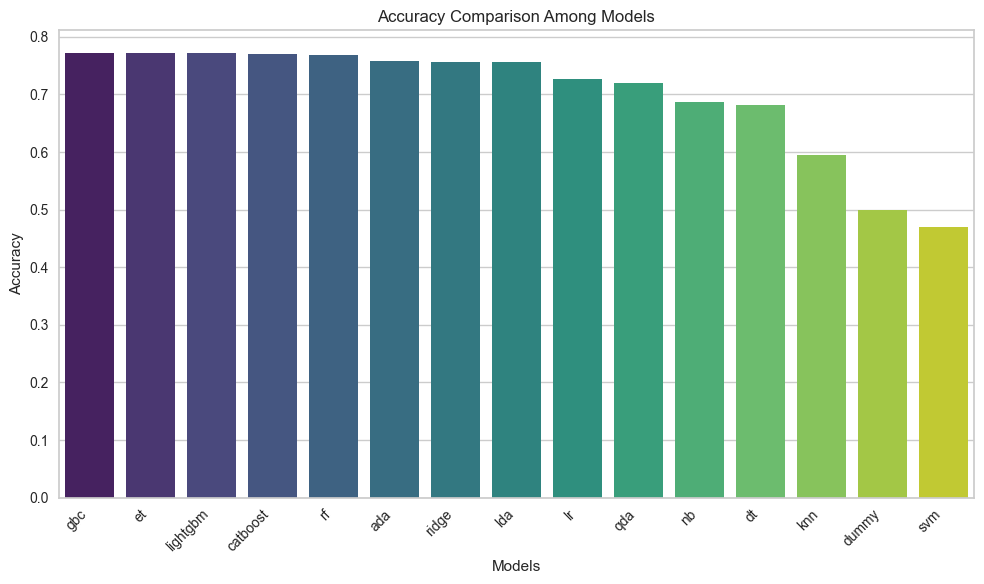

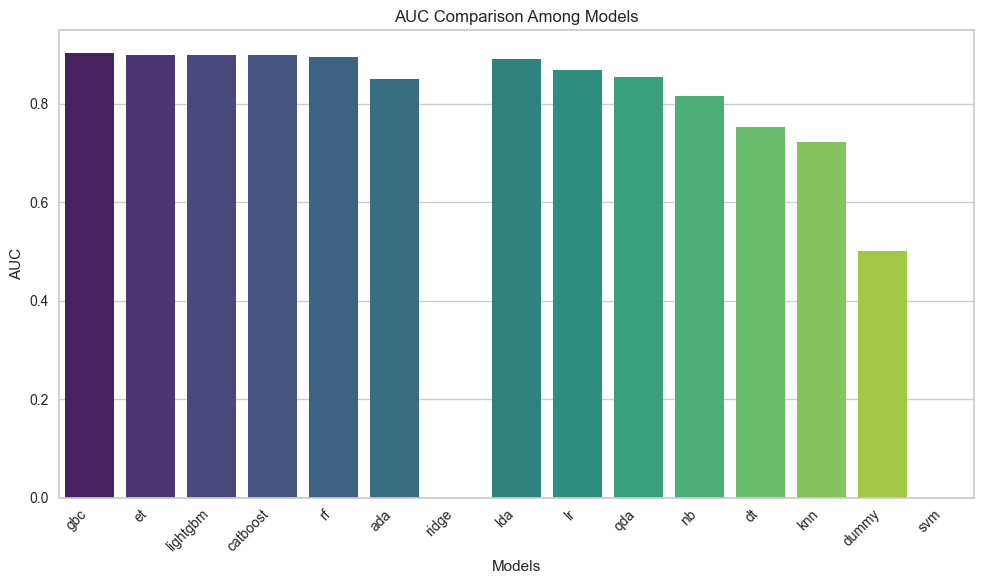

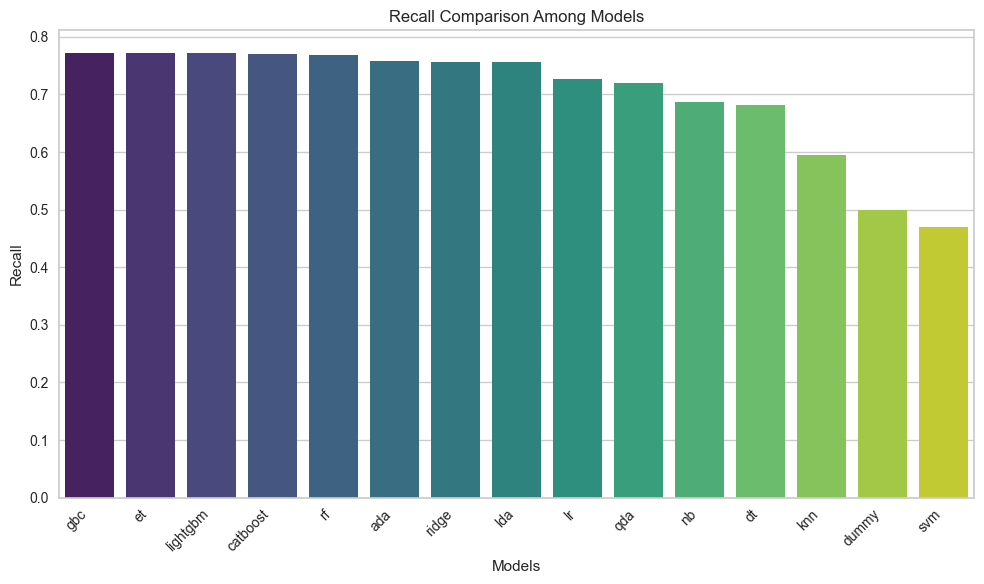

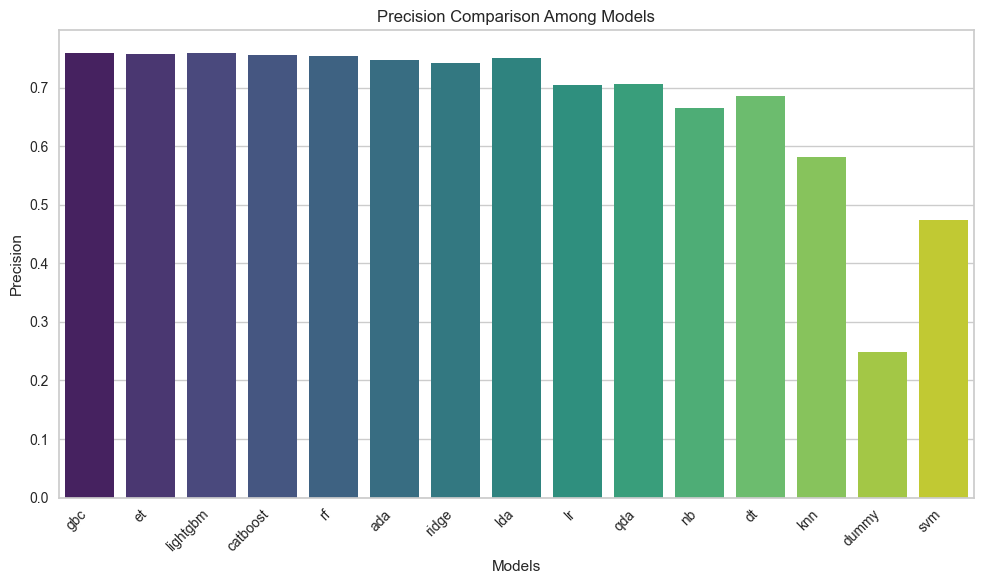

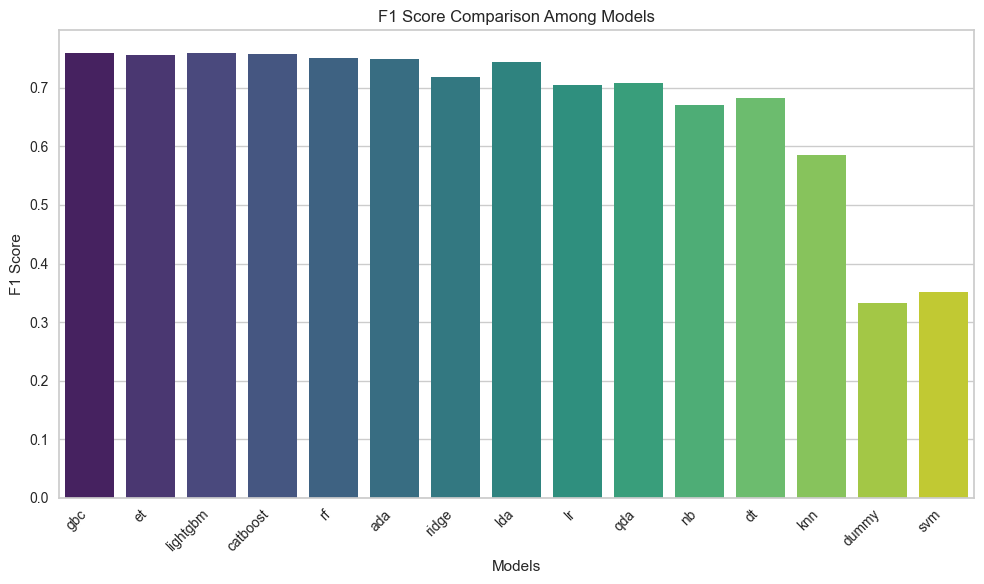

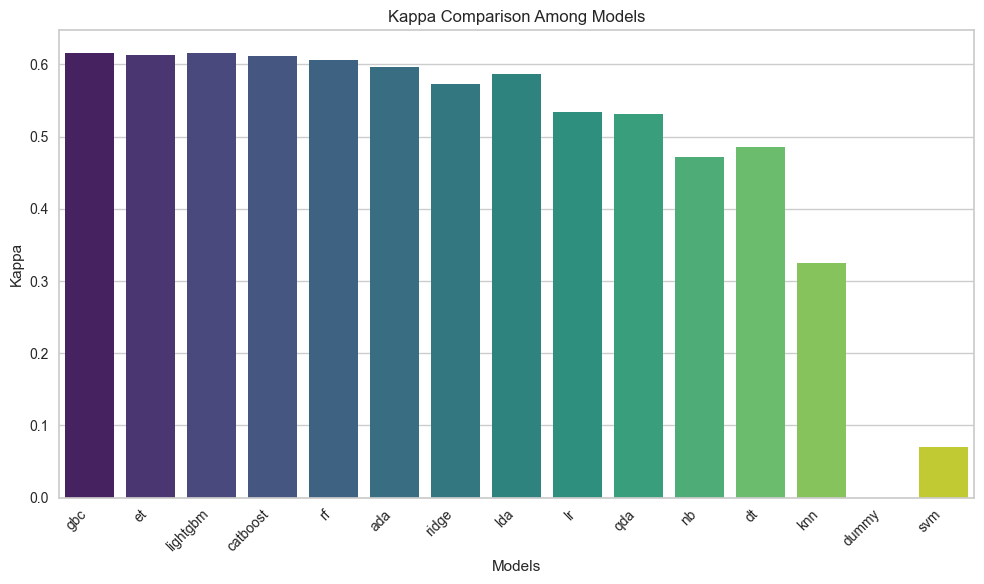

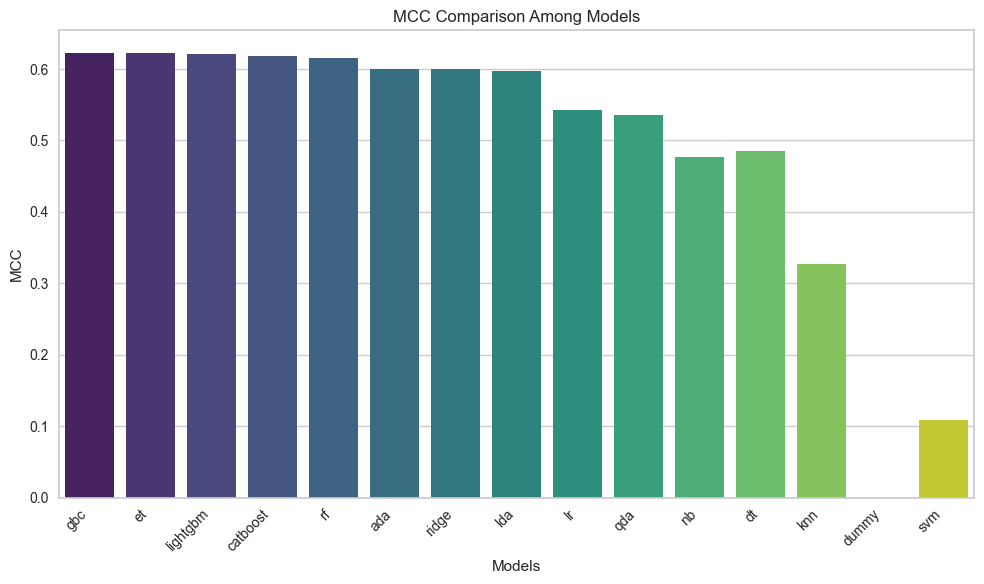

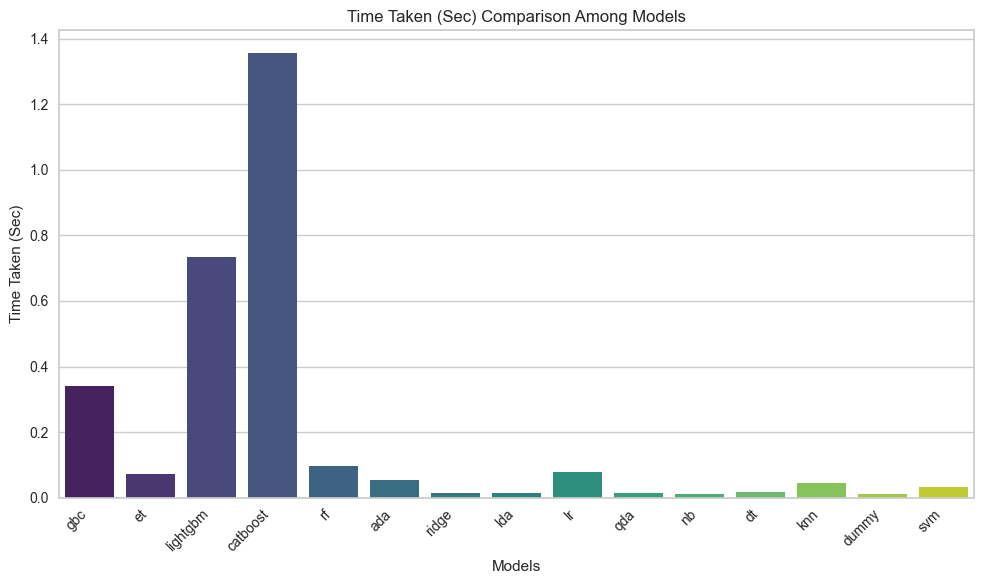

In [21]:
# Data
models = ['gbc', 'et', 'lightgbm', 'catboost', 'rf', 'ada', 'ridge', 'lda', 'lr', 'qda', 'nb', 'dt', 'knn', 'dummy', 'svm']
accuracy = [0.7726, 0.7723, 0.7713, 0.7694, 0.7684, 0.7587, 0.7571, 0.7564, 0.7264, 0.7203, 0.6873, 0.6822, 0.5940, 0.4994, 0.4698]
auc = [0.9039, 0.8985, 0.8996, 0.8984, 0.8957, 0.8496, 0.0, 0.8904, 0.8695, 0.8541, 0.8152, 0.7524, 0.7229, 0.5000, 0.0]
recall = [0.7726, 0.7723, 0.7713, 0.7694, 0.7684, 0.7587, 0.7571, 0.7564, 0.7264, 0.7203, 0.6873, 0.6822, 0.5940, 0.4994, 0.4698]
precision = [0.7599, 0.7571, 0.7597, 0.7566, 0.7535, 0.7475, 0.7414, 0.7505, 0.7054, 0.7064, 0.6661, 0.6861, 0.5809, 0.2494, 0.4732]
f1 = [0.7597, 0.7558, 0.7604, 0.7574, 0.7510, 0.7494, 0.7185, 0.7439, 0.7056, 0.7091, 0.6716, 0.6835, 0.5854, 0.3326, 0.3517]
kappa = [0.6164, 0.6126, 0.6161, 0.6121, 0.6058, 0.5968, 0.5726, 0.5867, 0.5339, 0.5309, 0.4718, 0.4853, 0.3256, 0.0, 0.0704]
mcc = [0.6230, 0.6221, 0.6214, 0.6178, 0.6153, 0.6005, 0.6002, 0.5976, 0.5429, 0.5353, 0.4771, 0.4858, 0.3271, 0.0, 0.1091]
time_taken = [0.34, 0.072, 0.733, 1.358, 0.097, 0.054, 0.013, 0.015, 0.079, 0.013, 0.01, 0.018, 0.045, 0.01, 0.031]

# Create a function to plot each metric
def plot_metric(metric, metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=metric, palette='viridis')
    plt.title(f'{metric_name} Comparison Among Models')
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metric(accuracy, 'Accuracy')
plot_metric(auc, 'AUC')
plot_metric(recall, 'Recall')
plot_metric(precision, 'Precision')
plot_metric(f1, 'F1 Score')
plot_metric(kappa, 'Kappa')
plot_metric(mcc, 'MCC')
plot_metric(time_taken, 'Time Taken (Sec)')
